In [15]:
# %load_ext autoreload
# %autoreload 2
import os
import xarray as xr
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
from scipy import stats
import numpy as np
import warnings
import util
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

run="dpscream_rce_large_3km_b_lpls300k_wbranch"
run_dir="/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/"
file=run_dir+f"{run}/run/{run}.eam.h0.2000-02-20-10800.nc"
print(file)
run_name=run.split("_wbranch")[0].split("_branch")[0].split('_')[-1]
color_dict = {"default300k":'gray', "lsascent300k":'darkcyan', "lpfrz300k":'cornflowerblue', "lpls300k":'darkorange',
              "default304k":'gray', "lsascent304k":'darkcyan', "lpfrz304k":'cornflowerblue', "lpls304k":'darkorange',
              "default":'gray', "lsascent":'darkcyan', "lpfrz":'cornflowerblue', "lpls":'darkorange', 'lpls300k_no_max_total_ni_a':'red', 'lpfrz_pert300k':'C0'}
run_color=color_dict[run_name]
print(run_name, run_color)

# for temp drift:
ndays=2
plt.rcParams['font.size']=18
chunks={"ncol":10000}
qsmall=1e-8

/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_b_lpls300k_wbranch/run/dpscream_rce_large_3km_b_lpls300k_wbranch.eam.h0.2000-02-20-10800.nc
lpls300k darkorange


# IOP 


In [6]:
iop_dir = "/glade/work/sturbeville/E3SM/inputdata/atm/cam/scam/iop/"
iop_file_def = iop_dir + "RCE_iopfile_4scam_no-mean-ascent.nc"
iop_file_ls = iop_dir + "RCE_iopfile_4scam_smooth-mean-ascent.nc"
iop_file_304k = iop_dir + "RCE_iopfile_4scam_no-mean-ascent_304K.nc"
iop_file_ls4k = iop_dir + "RCE_iopfile_4scam_smooth_w_profile.nc"

In [7]:
ds_def = xr.open_dataset(iop_file_def).isel(time=0).isel(lat=0).isel(lon=0)
ds_ls = xr.open_dataset(iop_file_ls).isel(time=0).isel(lat=0).isel(lon=0)
ds_304k = xr.open_dataset(iop_file_304k).isel(time=0).isel(lat=0).isel(lon=0)
ds_ls4k = xr.open_dataset(iop_file_ls4k).isel(time=0).isel(lat=0).isel(lon=0)
# ds_304k

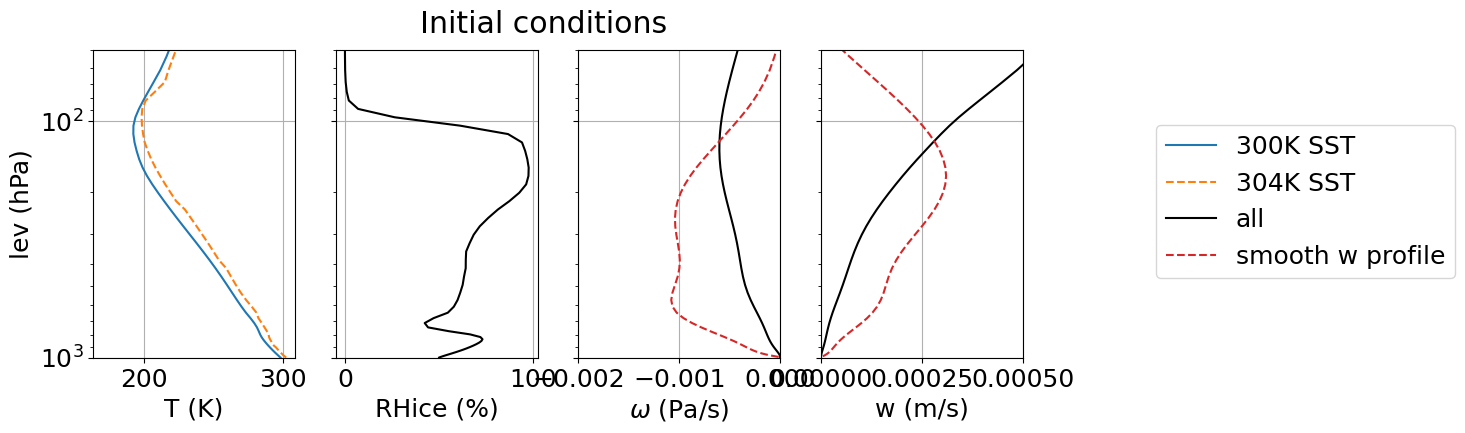

In [17]:
fig, ax = plt.subplots(1,4, figsize=(12,4), sharey=True)
ax[0].plot(ds_def['T'], ds_def.lev/100, label="300K SST")
ax[1].plot(util.calc_rhice(ds_def, varQ="q", z_units="Pa"), ds_def.lev/100, color="k")
ax[0].plot(ds_304k['T'], ds_304k.lev/100, label="304K SST", linestyle="dashed")
# ax[1].plot(ds_304k['q'], ds_304k.lev/100, label="304K SST", linestyle="dashed")
# ax[0].plot(ds_ls['T'], ds_ls.lev/100, label="LS ascent")
# ax[1].plot(ds_ls['q'], ds_ls.lev/100, label="LS ascent")
ax[2].plot(ds_ls['omega'], ds_ls.lev/100, label="all", color="k")
ax[3].plot(util.omega2w(ds_ls['omega'], ds_ls.lev.values, ds_ls['T'].values),
           ds_ls.lev/100, color="k")
# ax[0].plot(ds_ls4k['T'], ds_ls4k.lev/100, label="LS 304K", linestyle="dashed", color="C3")
# ax[1].plot(ds_ls4k['q'], ds_ls4k.lev/100, label="LS 304K", linestyle="dashed", color="C3")
ax[2].plot(ds_ls4k['omega'], ds_ls4k.lev/100, label="smooth w profile", linestyle="dashed", color="C3")
ax[3].plot(util.omega2w(ds_ls4k['omega'], ds_ls4k.lev, ds_ls4k['T']),
           ds_ls4k.lev/100, linestyle="dashed", color="C3")
ax[2].set(xlim=[-0.002,0])
ax[3].set(xlim=[0,0.0005])
ax[0].set(xlabel="T (K)", ylabel="lev (hPa)")
ax[1].set(xlabel="RHice (%)")
ax[2].set(xlabel="$\omega$ (Pa/s)")
ax[3].set(xlabel="w (m/s)")
for i in range(4):
    ax[i].grid(True)
fig.legend(loc=6, bbox_to_anchor=(1,0.5))
ax[0].set(ylim=[1000,50], yscale="log")
fig.suptitle("Initial conditions")
plt.savefig("../plots/large/iop_profiles_all.pdf", bbox_inches="tight", pad_inches=0.5)
plt.show()


# IWP hist and corresponding vars

In [2]:
runs = [
        "dpscream_rce_large_3km_b_default300k_wbranch",
        "dpscream_rce_large_3km_d_default304k_wbranch",
        "dpscream_rce_large_3km_lsascent300k_branch",
        "dpscream_rce_large_3km_lsascent304k_branch",
        "dpscream_rce_large_3km_lpfrz300k_branch",
        "dpscream_rce_large_3km_lpfrz304k_branch",
        "dpscream_rce_large_3km_b_lpls300k_wbranch",
        "dpscream_rce_large_3km_d_lpls304k_wbranch"
]
iwpbins = np.logspace(-4,4,40)

In [3]:
# run = "dpscream_rce_large_3km_d_lpls304k_wbranch"
# file = run_dir+f"{run}/run/{run}_h0_last5days.nc"
# xr.open_dataset(file)[["TGCLDIWP","LWCF","SWCF"]]

RUN: 0 default300k
RUN: 1 default304k
RUN: 2 lsascent300k
RUN: 3 lsascent304k
RUN: 4 lpfrz300k
RUN: 5 lpfrz304k
RUN: 6 lpls300k
RUN: 7 lpls304k
saved as nighttime


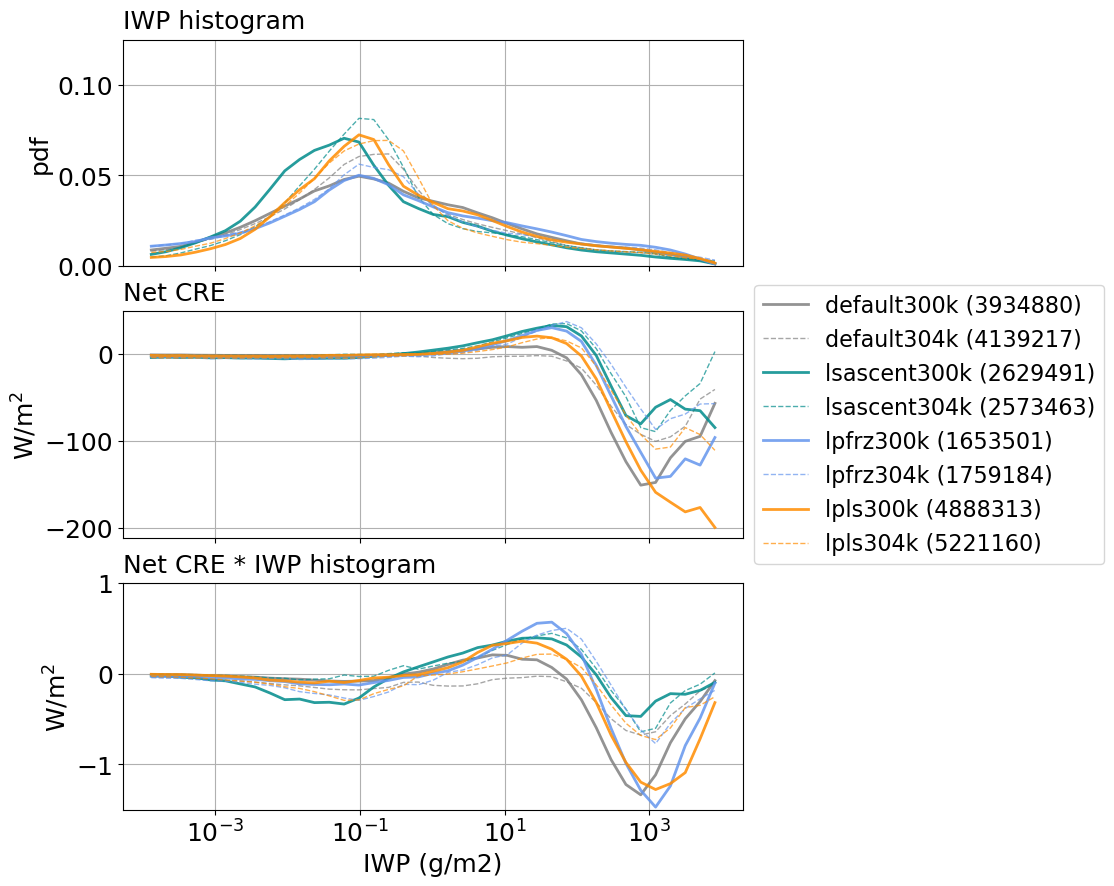

In [4]:
fig, [ax1,axr,axt] = plt.subplots(3,1, figsize=(8,10), sharex=True)
savename="nighttime"
ndays=5
for i,run in enumerate(runs):
    if run[-6:] == "branch":
        lab = run.split("_")[-2]
    else:
        lab = run.split("_")[-1]
    print("RUN:", i, lab)
    file = run_dir+f"{run}/run/{run}_h0_last5days.nc"
    ds = xr.open_dataset(file)[["T","IWC","TGCLDIWP","LWCF","SWCF"]].isel(time=slice(-ndays*8,-1))
    ds = ds.where(ds.SWCF<=0)
    iwp = ds.TGCLDIWP*1000
    n = np.nansum(~np.isnan(iwp.where(iwp>=1e-7)))
    iwp_hist, _ = np.histogram(iwp, bins=iwpbins)
    iwp_hist = iwp_hist/n
    bin_mids = (iwpbins[1:]+iwpbins[:-1])/2
    iwp_flat = iwp.values.flatten()
    ncre_stat, bin_edges, _ = stats.binned_statistic(iwp_flat,
                                                     (ds.LWCF+ds.SWCF).values.flatten(),
                                                     statistic="mean",
                                                     bins=iwpbins)
    if '300' in lab:
        ls = "solid"
        a = 0.85
        lw=2
    else:
        ls="dashed"
        a=0.7
        lw=1
    ax1.plot(bin_mids, iwp_hist, color=color_dict[lab], linestyle=ls, alpha=a, lw=lw)
    axr.plot(bin_mids, ncre_stat, label=f"{lab} ({n})", color=color_dict[lab], linestyle=ls, alpha=a, lw=lw)
    axt.plot(bin_mids, (ncre_stat)*iwp_hist, color=color_dict[lab], linestyle=ls, alpha=a, lw=lw)
    # get 2d field for insitu cirrus fraction
    # insitu cirrus only mask
    # insitu cirrus in column mask
    # nuc_file = run_dir + run + f"/run/{run}_NUC_hrs.nc"
    # bcu_file = run_dir + run + f"/run/{run}_BCU_hrs.nc"
    # nuc = xr.open_dataset(nuc_file).NUC.sel(time=ds.time, method="nearest")
    # print(nuc.time[0].values, nuc.time[-1].values)
    # nuc = nuc.where((ds['T']<233.15)&(ds['IWC']>=1e-8))
    # bcu = xr.open_dataset(bcu_file).BCU.sel(time=ds.time, method="nearest")
    # print(nuc.dims, bcu.dims, nuc[1].time.values, bcu[1].time.values)
    # insitu_only_mask = np.where((nuc<bcu)&(bcu>30), 1, 0)
    # insitu_any_mask = np.where((bcu<5)&(bcu>=3)&(nuc>=bcu), 1, 0)
    # print("insitu and detrained cirrus 3d mask created...", insitu_only_mask.shape, insitu_any_mask.shape)
    # insitu_only_cldcov = np.where(np.nansum(insitu_only_mask, axis=1)>=1,1,0)
    # insitu_any_cldcov = np.where(np.nansum(insitu_any_mask, axis=1)>=1,1,0)
    # print("insitu cirrus cloud cover calculated...", insitu_only_cldcov.shape, insitu_any_cldcov.shape)
    # insitu_only_stat, _, _ = stats.binned_statistic(iwp_flat,
    #                                                 insitu_only_cldcov.flatten(),
    #                                                 statistic="mean",
    #                                                 bins=iwpbins)
    # insitu_any_stat, _, _ = stats.binned_statistic(iwp_flat,
    #                                                insitu_any_cldcov.flatten(),
    #                                                statistic="mean",
    #                                                bins=iwpbins)
    # ax0.plot(bin_mids, insitu_only_stat, color=colors[i], linestyle=ls, lw=3)
    # ax0.plot(bin_mids, insitu_any_stat, color=colors[i], linestyle=ls, lw=1.5)
# ax0.grid()
ax1.grid()
axr.grid()
axt.grid()
# ax0.set(xscale="log")
ax1.set(xscale="log", ylim=[0,0.125], ylabel="pdf")
axr.set(xscale="log", ylabel="W/m$^2$")
axt.set(xscale="log", xlabel="IWP (g/m2)", ylabel="W/m$^2$", ylim=[-1.5,1])
# ax0.annotate("insitu cld cover", (0.,1.05), xycoords="axes fraction")
ax1.annotate("IWP histogram", (0.,1.05), xycoords="axes fraction")
axr.annotate("Net CRE", (0.,1.05), xycoords="axes fraction")
axt.annotate("Net CRE * IWP histogram", (0.,1.05), xycoords="axes fraction")
axr.legend(loc="center left", bbox_to_anchor=(1,0.5), fontsize=16)
plt.savefig(f"../plots/large/iwp_hist_{savename}_last{ndays}days_mean.png",
            bbox_inches="tight", pad_inches=1)
print('saved as',savename)
plt.show()

# temperature drift

In [ ]:
ds = xr.open_dataset(file.replace("h1","h0"), chunks={'time':24*ndays,'lev':64,'ncol':2000})[["T","Z3"]]
t_init = ds['T'].isel(time=0).mean(dim=['ncol'])
z_init = ds.Z3.isel(time=0).mean(dim=['ncol'])/1000
t_end = ds['T'].isel(time=slice(-ndays*4,-1)).mean(dim=['ncol','time'])
z_end = ds.Z3.isel(time=-1).mean(dim=['ncol'])/1000
t_drift = t_end-t_init

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,8))
print("t_init...")
ax.plot(t_init, z_init, label="initial temp", color="lightskyblue")
print("t_end...")
ax.plot(t_end, z_end, label=f"last {ndays} days", color="b")
print("t_drift...")
axt = ax.twiny()
axt.plot(t_drift, z_end, label="temp drift", color='gray',linestyle='--')
print("done")
ax.legend()
ax.set(ylim=[0,20], xlim=[185,301], xlabel="Temperature (K)", ylabel="Height (km)")
axt.set(ylim=[0,20], xlim=[-5,5], xlabel="Temperature drift (K)")
axt.axvline(0,0,20,color='k',lw=0.5)
ax.grid(True)
plt.savefig(f"../plots/large/temp_drift_{run}_{ndays}.png")
plt.show()

# Temperature at the end of each simulation

In [4]:
runs = [
        # "dpscream_rce_large_3km_default300k_branch",
        # "dpscream_rce_large_3km_default304k_branch",
        # "dpscream_rce_large_3km_lsascent300k_branch",
        # "dpscream_rce_large_3km_lsascent304k_branch",
        "dpscream_rce_large_3km_lpfrz300k_branch",
        "dpscream_rce_large_3km_lpfrz304k_branch",
        "dpscream_rce_large_3km_lpls300k",
        "dpscream_rce_large_3km_lpls304k"]

In [8]:
var_name = "deltaz"

RUN: 0 lpfrz300k
[########################################] | 100% Completed | 40.88 s
[########################################] | 100% Completed | 39.03 s
RUN: 1 lpfrz304k
[########################################] | 100% Completed | 42.31 s
[########################################] | 100% Completed | 42.18 s
RUN: 2 lpls300k
[########################################] | 100% Completed | 40.66 s
[########################################] | 100% Completed | 43.10 s
RUN: 3 lpls304k
[########################################] | 100% Completed | 48.06 s
[########################################] | 100% Completed | 31.55 s
saved as ../plots/large/deltaz_profile_lp-lpls300-304k_last5days.pdf


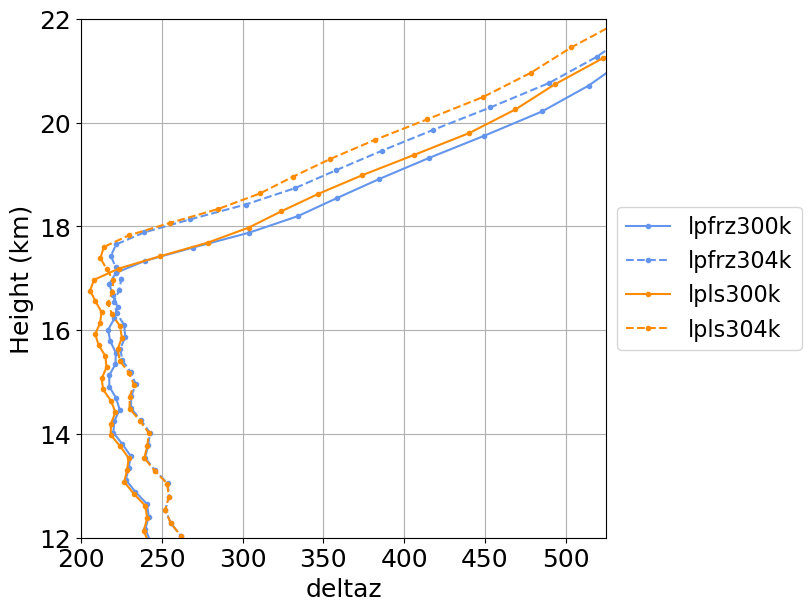

In [12]:
fig, ax1 = plt.subplots(1,1, figsize=(8,6), layout='constrained')
savename="lp-lpls300-304k"
ndays=5
for i,run in enumerate(runs):
    if run[-6:] == "branch":
        lab = run.split("_")[-2]
    else:
        lab = run.split("_")[-1]
    print("RUN:", i, lab)
    file = run_dir+f"{run}/run/{run}_h0_last5days.nc"
    zfile = run_dir+f"{run}/run/{run}_Z3_mean.nc"
    if var_name=="temp":
        ta = xr.open_dataset(file)["T"].isel(time=slice(-ndays*4,-1)).mean(dim=['ncol','time'])
    elif var_name=="rhice":
        ds = xr.open_dataset(file, chunks=chunks)[["T","Q"]].isel(time=slice(-ndays*4,-1))
        ta = util.calc_rhice(ds).mean(dim=['ncol','time']) # rhice
    elif var_name=='deltaz':
        ds = xr.open_dataset(file, chunks=chunks)[["Z3"]].isel(time=slice(-ndays*4,-1))
        ta = (ds.Z3[:,:-1,:]-ds.Z3[:,1:].values).mean(dim=['time','ncol'])
    else:
        ta = xr.open_dataset(file)[var_name].isel(time=slice(-ndays*4,-1)).mean(dim=['ncol','time'])
    z = xr.open_dataset(zfile).Z3.isel(time=0).isel(x=0).isel(y=0)
    if var_name=='deltaz':
        z = (z[1:].values+z[:-1].values)/2
    z = z/1000
    if '300' in lab:
        ls = "solid"
    else:
        ls="dashed"
    ax1.plot(ta, z, label=lab, color=color_dict[lab], linestyle=ls, marker='.')
ax1.grid()
ax1.set(
        ylim=[12,22],
        # ylim=[0,12],
        # xlim=[180,220],
        xlim=[200,525],
        # xlabel="Temperature (K)",
        xlabel=var_name,
        ylabel="Height (km)")
ax1.legend(loc="center left", bbox_to_anchor=(1,0.5), fontsize=16)
plt.savefig(f"../plots/large/{var_name}_profile_{savename}_last{ndays}days.pdf")
print(f"saved as ../plots/large/{var_name}_profile_{savename}_last{ndays}days.pdf")
plt.show()

# OLR and PW var over time - movie

In [5]:
ds = xr.open_dataset(file, chunks={'time':200,'ncol':2000})
ndays = int((ds.time[-1]-ds.time[0]).values/1e9/3600/24) # for branch
print(ds.time[0].values, ds.time[1].values, len(ds.time),"nsteps and ", ndays,"days")
olr = ds.FLUT
pw = ds.TMQ
# pw_anom = pw - pw.mean(dim=['ncol'])
# pw_var = pw_anom.var(dim=['ncol']).values
x = ds.crm_grid_x/1000
y = ds.crm_grid_y/1000
days = np.linspace(50,50+ndays,len(ds.time))
print(x.shape, olr.shape, days.shape)
# del ds, pw, pw_anom
print(x[0].shape, y[0].shape, olr[0].shape, pw[0].shape)

2000-02-20 03:00:00 2000-02-20 06:00:00 80 nsteps and  9 days
(80, 147456) (80, 147456) (80,)
(147456,) (147456,) (147456,) (147456,)


### Movie snapshots:

[########################################] | 100% Completed | 101.27 ms
[########################################] | 100% Completed | 201.96 ms
[########################################] | 100% Completed | 301.95 ms
[########################################] | 100% Completed | 326.54 ms
[########################################] | 100% Completed | 104.94 ms
[########################################] | 100% Completed | 202.20 ms
[########################################] | 100% Completed | 302.35 ms
[########################################] | 100% Completed | 327.36 ms
[########################################] | 100% Completed | 102.05 ms
[########################################] | 100% Completed | 202.23 ms
[########################################] | 100% Completed | 301.79 ms
[########################################] | 100% Completed | 327.38 ms
[########################################] | 100% Completed | 102.67 ms
[########################################] | 100% Completed | 20

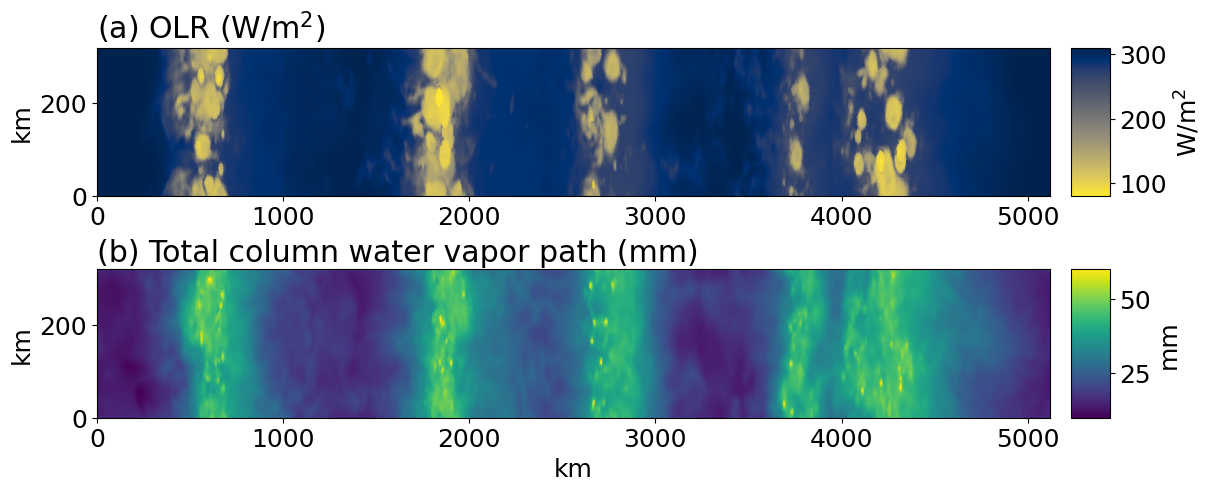

In [9]:
cmapr="cividis_r"

# do it only 60 at a time to not go over the memory limit
# for t in range(0,10*24,3):  # range(len(olr.time)-2):
t=-5

print(t, end="... ")
fig = plt.figure(figsize=plt.figaspect(0.4), layout='constrained')
gs = GridSpec(2, 2, figure=fig, width_ratios=[100,4])
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
cax0 = fig.add_subplot(gs[0,1])
cax1 = fig.add_subplot(gs[1,1])
im_olr = ax0.tripcolor(y[t,:], x[t,:], olr[t,:],
                       vmin=80, vmax=310, shading="gouraud", cmap=cmapr)
ax0.set(ylabel="km",
        xlim=[0,5120], ylim=[0,320])
plt.colorbar(im_olr, label="W/m$^2$", cax=cax0)
im_pw = ax1.tripcolor(y[t,:], x[t,:], pw[t,:],
                      vmin=10, vmax=60, shading="gouraud", cmap='viridis')
ax1.set(xlabel="km",ylabel="km",
        xlim=[0,5120], ylim=[0,320])
plt.colorbar(im_pw, label="mm", cax=cax1)
# ax1.plot(days[:t], pw_var[:t], 'k')
# ax1.set(xlim=[0,50],xlabel='days',
#         ylim=[0,230],ylabel='PW var')
# savename=f"../plots/movie/large_default_branch/olr_pwvar_{t:04d}.png"
ax0.set_title("(a) OLR (W/m$^2$)", loc='left')
ax1.set_title('(b) Total column water vapor path (mm)', loc='left')
savename=f'../plots/large/fig1_olr_pw_snapshot_{run_name}_t{t:04d}.png'
plt.savefig(savename)
print("saved as "+savename)
plt.show()


# 2d vars over time

## radiation

In [8]:
runs = [['dpscream_rce_large_3km_lpls300k', None],
        ['dpscream_rce_large_3km_lpls300k_pert_aa', None]]


In [9]:
var = "FLUT"
ds_means = {}
days = {}
for i,run in enumerate(runs):
    if run[1] is not None:
        run_name = run[1].split("_")[-2]
    else:
        run_name = run[0][-8:]
    print("RUN:", i+1, run_name)
    if run[1] is None:
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc"]
    elif run[1].split("_")[-2][:3]=="def":
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc",
                 run_dir+f"{run[1]}/run/{run[1]}.eam.h1.2000-02-20-03600.nc"]
    elif run[1].split("_")[-2]=="lpfrz304k":
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc",
                 run_dir+f"{run[1]}/run/{run[1]}.eam.h1.2000-02-10-10800.nc"]
    else:
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc",
                 run_dir+f"{run[1]}/run/{run[1]}.eam.h1.2000-02-20-10800.nc"]
    if var=="FLUT":
        ds = xr.open_mfdataset(files, chunks={'time':200,'ncol':2000})[['time', 'FLUT']]
    elif var=="albedo":
        ds = xr.open_mfdataset(files, chunks={'time':200,'ncol':2000})[['time', 'FSUTOA', 'SOLIN']]
        alb = (ds.FSUTOA/ds.SOLIN).where((ds.time.dt.hour==12))
        ds = ds.assign({'albedo':alb})
    print(ds[var].shape, ds.time.shape)
    ndays = int((ds.time[-1]-ds.time[0]).values/1e9/3600/24)
    print(ds.time[0].values, ds.time[1].values, len(ds.time),"nsteps and ", ndays,"days")
    days[run_name] = np.linspace(0,ndays,len(ds.time))
    ds_means[run_name] = ds[var].mean(dim=['ncol']).compute()

RUN: 1 lpls300k
(201, 147456) (201,)
2000-01-01 00:00:00 2000-01-01 06:00:00 201 nsteps and  50 days
[########################################] | 100% Completed | 4.97 sms
[########################################] | 100% Completed | 5.07 s
RUN: 2 _pert_aa


FileNotFoundError: [Errno 2] No such file or directory: '/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_lpls300k_pert_aa/run/dpscream_rce_large_3km_lpls300k_pert_aa.eam.h1.2000-01-01-00000.nc'

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5), layout="constrained")

for i, run in enumerate(runs):
    if run[1] is not None:
        run_name = run[1].split("_")[-2]
    else:
        run_name = run[0][-8:]
    print("RUN:", i+1, run_name)
    ax.plot(days[run_name], ds_means[run_name], color=colors[i], label=run_name)
ax.grid(True)
ax.set(xlabel="days", ylabel=var)
ax.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.savefig(f"../plots/large/{var}_timeseries.pdf")
plt.show()

## PW variance time series

In [16]:
runs = [["dpscream_rce_large_3km_aa_default","dpscream_rce_large_3km_b_default300k_wbranch"],
        ["dpscream_rce_large_3km_aa_304ksst","dpscream_rce_large_3km_d_default304k_wbranch"],
        ["dpscream_rce_large_3km_ab_lsascent", "dpscream_rce_large_3km_lsascent300k_branch", "dpscream_rce_large_3km_a_lsascent300k_wbranch"],
        ["dpscream_rce_large_3km_aa_lsascent_304ksst","dpscream_rce_large_3km_lsascent304k_branch"],
        ["dpscream_rce_large_3km_aa_lpfrz", "dpscream_rce_large_3km_lpfrz300k_branch", "dpscream_rce_large_3km_a_lpfrz300k_wbranch"],
        ["dpscream_rce_large_3km_aa_lpfrz304k", "dpscream_rce_large_3km_lpfrz304k_branch"],
        ["dpscream_rce_large_3km_lpls300k", "dpscream_rce_large_3km_b_lpls300k_wbranch"],
        ["dpscream_rce_large_3km_lpls304k", "dpscream_rce_large_3km_d_lpls304k_wbranch"]]
runs = [["dpscream_rce_large_3km_aa_lpfrz", "dpscream_rce_large_3km_lpfrz300k_branch", "dpscream_rce_large_3km_a_lpfrz300k_wbranch"],
        ["dpscream_rce_large_3km_lpls300k_pert_aa"]]
markers=["D","D","X","X","s","s","o","o"]
run_dict = dict(zip(["default300k","default304k","lsascent300k","lsascent304k",
                     "lpfrz300k","lpfrz304k","lpls300k","lpls304k"],runs))
run_dict = dict(zip(['lpfrz300k','lpfrz_pert300k'],runs))


In [17]:
# run_dict["default300k"][1]

In [18]:
list(run_dict.keys())

['lpfrz300k', 'lpfrz_pert300k']

0 lpfrz300k
... getting files
2000-01-01 00:00:00 2000-01-01 01:00:00 1401 nsteps and  65 days
862 40.02142857142857 False
mean PW... (1401,)
pw_var anom...
[########################################] | 100% Completed | 2.18 sms
[########################################] | 100% Completed | 2.28 s
pw_var normalized...
[########################################] | 100% Completed | 510.50 ms
[########################################] | 100% Completed | 534.72 ms
(1401,) (1401,)
[########################################] | 100% Completed | 1.01 sms
[########################################] | 100% Completed | 1.03 s
1 lpfrz_pert300k
... getting files
2000-01-01 00:00:00 2000-01-01 06:00:00 61 nsteps and  15 days
60 15.0 False
mean PW... (61,)
pw_var anom...
[########################################] | 100% Completed | 203.29 ms
[########################################] | 100% Completed | 223.94 ms
pw_var normalized...
[########################################] | 100% Completed | 101.19 ms
[

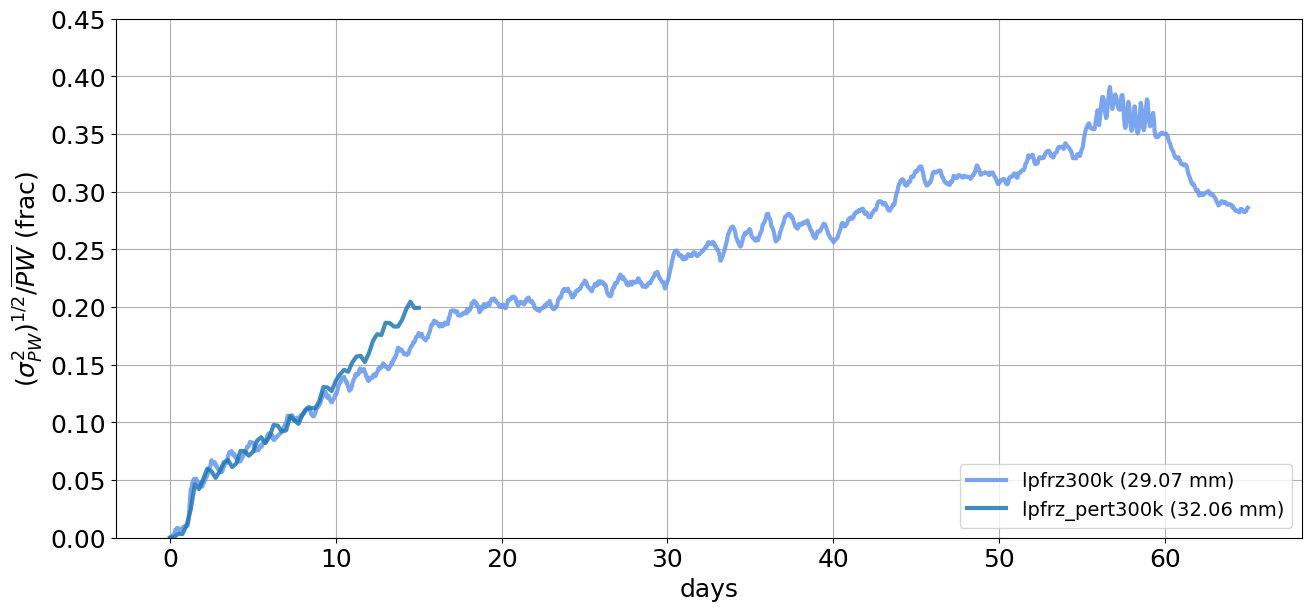

In [19]:
fig, ax1 = plt.subplots(1,1, figsize=(13,6), layout='constrained')
savename=""
for i,run in enumerate(list(run_dict.keys())):
    if run_dict[run][0] is not None:
        print(i, run)
    else:
        print("run 0 is none")
        print(i, run)
    if run[-4:]=="300k":
        ls='solid'
        lw=3
        a=0.85
    elif run[-4:]=="304k":
        ls='dashed'
        lw=1.5
        a=0.7
    print("... getting files")
    files=[None]*len(run_dict[run])
    for i in range(len(run_dict[run])):
        for x in os.listdir(run_dir+run_dict[run][i]+"/run/"):
            file_name_start = run_dict[run][i]+".eam.h1"
            if x.startswith(file_name_start):
                files[i] = run_dir+run_dict[run][i]+"/run/"+x
    ds = xr.open_mfdataset(files, chunks={'time':200,'ncol':2000})[['time','TMQ']]
    ndays = int((ds.time[-1]-ds.time[0]).values/1e9/3600/24)
    print(ds.time[0].values, ds.time[1].values, len(ds.time),"nsteps and ", ndays,"days")
    days = np.linspace(0,ndays,len(ds.time))
    n40 = np.argmin(abs(days-40))
    print(n40, days[n40], days[n40]==40)
    pw_mean = ds.TMQ.mean(dim=['ncol'])
    print("mean PW...", pw_mean.shape)
    pw_var = ds.TMQ - pw_mean  # anom
    print("pw_var anom...")
    pw_var = np.sqrt(pw_var.var(dim=['ncol']).values)  # sum(anom**2)/len(anom)
    # pw_var = np.nansum(np.square(pw_var), axis=1)/pw_var.shape[1]
    pw_var = pw_var/pw_mean  # normalize over the mean (dimensionless)
    # pw_var = pw_var.std(dim=['ncol'])/pw_mean
    print("pw_var normalized...")
    pw_40day_mean = ds.TMQ[n40:].mean(dim=['ncol','time']).values
    # x = ds.crm_grid_x/1000
    # y = ds.crm_grid_y/1000
    print(pw_var.shape, days.shape)
    del ds
    lab = run
    savename+="_"+lab
    ax1.plot(days, pw_var, c=color_dict[run], linestyle=ls,
             label=f"{lab} ({pw_40day_mean:.02f} mm)",
             alpha=a, lw=lw)
    ax1.set(xlabel='days',
            ylim=[0,0.45],
            # xlim=[0,55],
            ylabel='$(\sigma^2_{PW})^{1/2}/\overline{PW}$ (frac)')
ax1.grid()
ax1.legend(loc=4, fontsize=14)
# ax1.legend(loc=2, fontsize=10)
plt.savefig(f"../plots/large/PW_var{savename}_sqrtpwvar_norm.pdf",bbox_inches="tight", pad_inches=0.5)
print('saved as',savename)
plt.show()

0 lpfrz300k
... getting file
/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_a_lpfrz300k_wbranch/run/dpscream_rce_large_3km_a_lpfrz300k_wbranch.eam.h1.2000-03-02-03600.nc
[########################################] | 100% Completed | 202.06 ms
[########################################] | 100% Completed | 219.35 ms
[########################################] | 100% Completed | 103.62 ms
[########################################] | 100% Completed | 119.91 ms
[########################################] | 100% Completed | 102.06 ms
[########################################] | 100% Completed | 119.03 ms
[########################################] | 100% Completed | 101.76 ms
[########################################] | 100% Completed | 119.78 ms
1 lpfrz_pert300k
... getting file
/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_lpls300k_pert_aa/run/dpscream_rce_large_3km_lpls300k_pert_aa.eam.h1.2000-01-01-00000.nc
[####################

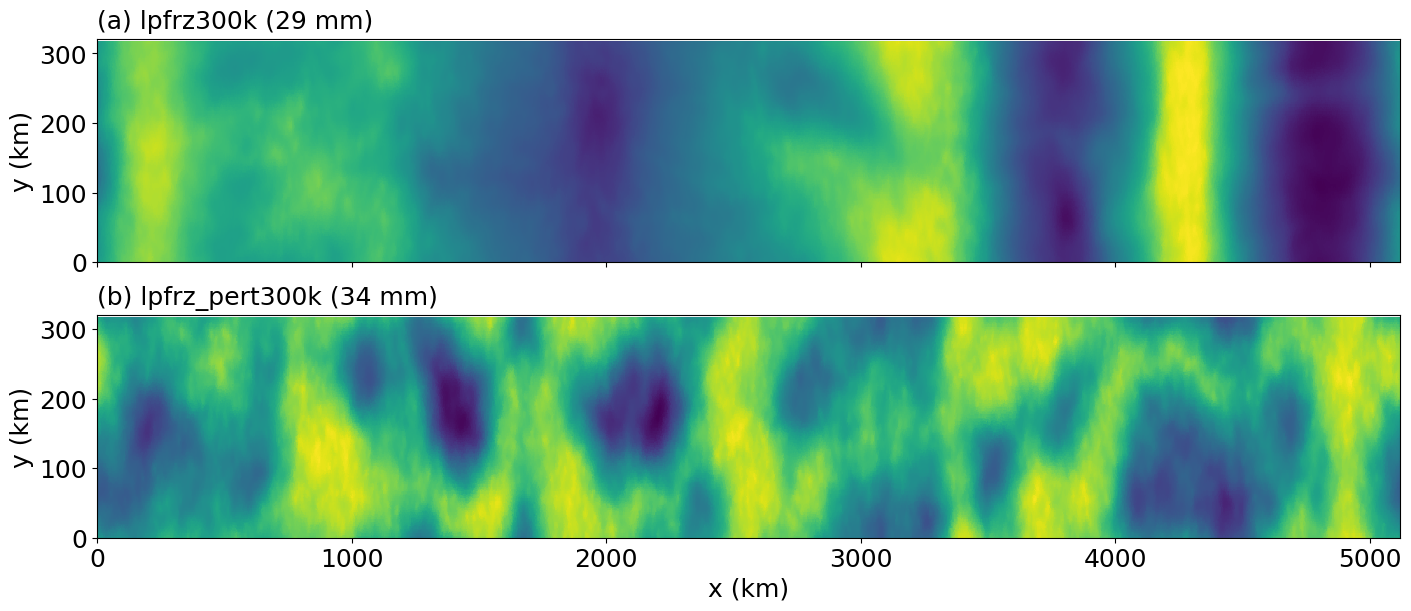

In [22]:
# zonal mean PW over the last five days of the simulation
fig, ax = plt.subplots(len(runs),1, figsize=(14,3*len(runs)), layout='constrained', sharex=True, sharey=True)
savename=""
for i,run in enumerate(list(run_dict.keys())):
    print(i, run)
    print("... getting file")
    for x in os.listdir(run_dir+run_dict[run][-1]+"/run/"):
        file_name_start = run_dict[run][-1]+".eam.h1"
        if x.startswith(file_name_start):
            file = run_dir+run_dict[run][-1]+"/run/"+x
    print(file)
    ds = xr.open_dataset(file, chunks={'time':200,'ncol':2000})[['time','TMQ','crm_grid_y', 'crm_grid_x']]
    pw_plot = ds.mean(dim=['time'])
    ax[i].tripcolor(pw_plot.crm_grid_y.values/1000, pw_plot.crm_grid_x.values/1000, pw_plot.TMQ.values,
                    cmap='viridis')
    ax[i].set(ylabel="y (km)")
    ax[i].annotate(f"({(chr(ord('`')+i+1))}) {run} ({int(ds.TMQ.mean().values)} mm)", xy=(0.0,1.05), xycoords="axes fraction")
    savename += run


ax[-1].set(xlabel="x (km)", xlim=[0,5120], ylim=[0,320])
plt.savefig(f"../plots/large/PW_timemean_{savename}.pdf",bbox_inches="tight", pad_inches=0.5)
print('saved as',"PW_mean_"+savename)
plt.show()

## in-situ cloud fraction

we define in-situ as NUC < BCU, NUC < BCU-2, ...


### spatial plot

In [17]:
file = run_dir + run + f"/run/{run}.eam.h0.2000-01-01-00000.nc"
file2d = run_dir + run + f"/run/{run}.eam.h1.2000-01-01-00000.nc"
nuc_file = run_dir + run + f"/run/{run}_NUC_hrs.nc"
bcu_file = run_dir + run + f"/run/{run}_BCU_hrs.nc"
print(file)

ice = xr.open_dataset(file)[["IWC","T","crm_grid_x","crm_grid_y"]].isel(time=slice(-ndays*4,-1))
x = ice.crm_grid_x.isel(time=0)/1000
y = ice.crm_grid_y.isel(time=0)/1000
print(x.shape, y.shape)

/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_aa_lpfrz304k/run/dpscream_rce_large_3km_aa_lpfrz304k.eam.h0.2000-01-01-00000.nc
(147456,) (147456,)


In [18]:
bcu = xr.open_dataset(bcu_file).BCU.rename({'x':'ncol'}).sel(time=ice.time, method="nearest")
# print(bcu.dims, bcu[1].time.values)
# tmp = np.where(np.nansum(np.where(bcu<2,1,0), axis=1)>=2,1,0)
# print(tmp.shape)
# bcu0 = np.mean(tmp, axis=0)
# bcu0.shape

In [19]:
nuc = xr.open_dataset(nuc_file).NUC.rename({'x':'ncol'}).sel(time=ice.time, method="nearest")
nuc = nuc.where((ice['T']<233.15)&(ice['IWC']>=1e-8))
nuc0 = np.mean(np.where(np.nansum(np.where(nuc<(bcu-5),1,0), axis=1)>=1,1,0), axis=0)
nuc0.shape

(147456,)

In [20]:
iwp = xr.open_dataset(file)["TGCLDIWP"].sel(time=ice.time, method="nearest")
iwp_plot = np.log10(iwp.mean(dim=["time"]))+3
iwp.shape, iwp_plot.shape

((19, 147456), (147456,))

In [21]:
# nuc0 = nuc0/(nuc.shape[0]*nuc.shape[2])
# bcu0 = bcu0/(nuc.shape[0]*nuc.shape[2])
# nuc0 = np.nanmean(np.where(nuc<bcu,1,0), axis=(0,1))
# bcu0 = np.nanmean(np.where(bcu<=0.125,1,0), axis=(0,1))
# print(nuc.shape, nuc0.shape, bcu0.shape)  # , nuc2.shape)

saved as ../plots/large/insitu_cirrus_frac_iwp_lpfrz304k_last5days.png


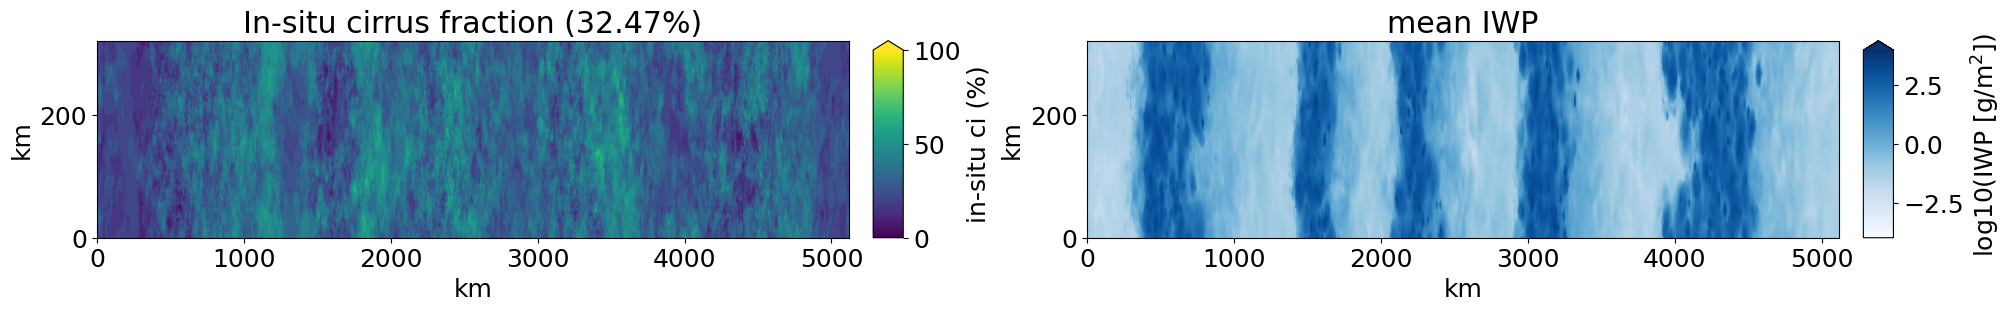

In [22]:
fig = plt.figure(figsize=(20,3), layout='constrained')
gs = GridSpec(1, 4, figure=fig, width_ratios=[100,4,100,4], hspace=0)
savename=""
if run.split("_")[-2]=="lsascent":
    lab = "lsascent304k"
else:
    lab=run.split("_")[-1]
savename+=lab

ax0 = fig.add_subplot(gs[0,0])
cax0 = fig.add_subplot(gs[0,1])
im = ax0.tripcolor(y, x, nuc0*100,
                   vmin=0, vmax=100,
                   shading="gouraud", cmap="viridis")
plt.colorbar(im, label="in-situ ci (%)", cax=cax0, shrink=0.8, extend='max')
ax1 = fig.add_subplot(gs[0,2])
cax1 = fig.add_subplot(gs[0,3])
im = ax1.tripcolor(y, x, iwp_plot,
                   vmin=-4, vmax=4,
                   shading="gouraud", cmap="Blues")
plt.colorbar(im, label="log10(IWP [g/m$^2$])", cax=cax1, shrink=0.8, extend='max')

ax0.set(ylabel="km", xlabel="km",
        xlim=[0,5120], ylim=[0,320])
ax1.set(xlabel="km",ylabel="km",
        xlim=[0,5120], ylim=[0,320])
ax0.set_title(f"In-situ cirrus fraction ({(np.nanmean(nuc0)*100):.02f}%)")
ax1.set_title("mean IWP")  # ({(np.nanmean(bcu0)*100):.02f}%)")
savename=f"../plots/large/insitu_cirrus_frac_iwp_{savename}_last{ndays}days.png"
plt.savefig(savename, dpi=150)
print("saved as "+savename)
plt.show()

### vertical plot

In [ ]:
# file = run_dir + run + f"/run/{run}.eam.h0.2000-01-01-00000.nc"
nuc_file = run_dir + run + f"/run/{run}_NUC_hrs.nc"
bcu_file = run_dir + run + f"/run/{run}_BCU_hrs.nc"
wnuc_file = run_dir + run + f"/run/{run}_W_NUC_hrs.nc"
print(file)

ice = xr.open_dataset(file, chunks={'x':2000})[["IWC","T","Z3","QRS","QRL","crm_grid_x","crm_grid_y"]].isel(time=slice(-ndays*8,-1))
z = ice.Z3.mean(dim=['time','ncol'])  # ice['T'].mean(dim=['time','ncol'])
print(z.shape)
print(ice.time[0].values, ice.time[-1].values)
nuc = xr.open_dataset(nuc_file).NUC.sel(time=ice.time, method="nearest")
print(nuc.time[0].values, nuc.time[-1].values)
nuc = nuc.where((ice['T']<233.15)&(ice['IWC']>=1e-8))
bcu = xr.open_dataset(bcu_file).BCU.sel(time=ice.time, method="nearest")
wnuc = xr.open_dataset(wnuc_file).W_NUC.sel(time=ice.time, method="nearest")
print(nuc.dims, bcu.dims, nuc[1].time.values, bcu[1].time.values, wnuc[1].time.values)
insitu_slow_mask = np.where((nuc<bcu)&(bcu>30)&(wnuc<0.01), 1, 0)
insitu_fast_mask = np.where((nuc<bcu)&(bcu>30)&(wnuc>=0.1), 1, 0)
print("masks calculated.")
insitu_slow_profile = np.nanmean(insitu_slow_mask, axis=(0,2)) # slow updraft insitu
insitu_fast_profile = np.nanmean(insitu_fast_mask, axis=(0,2)) # fast updraft insitu
print("profiles calculated.", insitu_slow_profile.shape, insitu_fast_profile.shape)
# ci_cldcov = np.mean(np.where(np.nansum(np.where((nuc<bcu)&(bcu>30)&(wnuc<0.01),1,0), axis=1)>=1,1,0))
# dc_cldcov = np.mean(np.where(np.nansum(np.where((nuc<bcu)&(bcu>30)&(wnuc>=0.1),1,0), axis=1)>=1,1,0))
# print(nuc.shape, nuc0.shape, bcu0.shape)  # , nuc2.shape)


/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_b_default300k_wbranch/run/dpscream_rce_large_3km_b_default300k_wbranch.eam.h0.2000-02-20-10800.nc
(128,)
2000-02-23 03:00:00 2000-02-24 21:00:00
2000-02-23 03:00:00 2000-02-24 21:00:00
('time', 'lev', 'ncol') ('time', 'lev', 'ncol') 2000-02-23 06:00:00 2000-02-23 06:00:00 2000-02-23 06:00:00
[################################        ] | 80% Completed | 12.84 ss

In [ ]:
heating_lw_slow = ice["QRL"].where(insitu_slow_mask).mean(dim=['time','ncol'])*3600*24
heating_lw_fast = ice["QRL"].where(insitu_fast_mask).mean(dim=['time','ncol'])*3600*24
heating_sw_slow = ice["QRS"].where(insitu_slow_mask).mean(dim=['time','ncol'])*3600*24
heating_sw_fast = ice["QRS"].where(insitu_fast_mask).mean(dim=['time','ncol'])*3600*24
heating_net_slow = heating_lw_slow + heating_sw_slow
heating_net_fast = heating_lw_fast + heating_sw_fast

In [ ]:
# trop_z = np.argmin(z.values)
# trop_z

In [ ]:
insitu_slow_profile.shape, z.shape, z.values

In [ ]:
heating_net_slow

In [17]:
insitu_slow_profile = xr.DataArray(insitu_slow_profile, dims=['lev'], coords={'lev':ice.lev})
insitu_fast_profile = xr.DataArray(insitu_fast_profile, dims=['lev'], coords={'lev':ice.lev})

In [18]:
ds_new = xr.Dataset({"insitu_slow_frac": insitu_slow_profile, "insitu_fast_frac": insitu_fast_profile,
                    "heating_lw_slow": heating_lw_slow, "heating_lw_fast":heating_lw_fast,
                    "heating_sw_slow":heating_sw_slow, "heating_sw_fast":heating_sw_fast,
                    "heating_net_slow":heating_net_slow, "heating_net_fast":heating_net_fast,
                    "z_temp":z}, 
                   coords={"lev":ice.lev}, 
                   attrs={"run":run, "averaged over n days":ndays})

In [19]:
ds_new

<xarray.Dataset> Size: 7kB
Dimensions:           (lev: 128)
Coordinates:
  * lev               (lev) float64 1kB 2.58 3.23 3.88 ... 991.0 994.9 998.5
Data variables:
    insitu_slow_frac  (lev) float64 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    insitu_fast_frac  (lev) float64 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    heating_lw_slow   (lev) float32 512B dask.array<chunksize=(128,), meta=np.ndarray>
    heating_lw_fast   (lev) float32 512B dask.array<chunksize=(128,), meta=np.ndarray>
    heating_sw_slow   (lev) float32 512B dask.array<chunksize=(128,), meta=np.ndarray>
    heating_sw_fast   (lev) float32 512B dask.array<chunksize=(128,), meta=np.ndarray>
    heating_net_slow  (lev) float32 512B dask.array<chunksize=(128,), meta=np.ndarray>
    heating_net_fast  (lev) float32 512B dask.array<chunksize=(128,), meta=np.ndarray>
    z_temp            (lev) float32 512B dask.array<chunksize=(128,), meta=np.ndarray>
Attributes:
    run:                   dpscream_rce_large_3km_b_default300k_wbranch
    averaged over n days:  2

In [20]:
ds_new.to_netcdf(f"../stats/insitu_slow_fast_updraft_frac_heating_{run}.nc")

[########################################] | 100% Completed | 26.46 s
[########################################] | 100% Completed | 26.56 s


In [3]:
runs=["dpscream_rce_large_3km_b_default300k_wbranch","dpscream_rce_large_3km_d_default304k_wbranch",
      "dpscream_rce_large_3km_b_lpls300k_wbranch", "dpscream_rce_large_3km_d_lpls304k_wbranch"]

dpscream_rce_large_3km_b_default300k_wbranch
gray
dpscream_rce_large_3km_d_default304k_wbranch
gray
dpscream_rce_large_3km_b_lpls300k_wbranch
gold
dpscream_rce_large_3km_d_lpls304k_wbranch
gold
2
saved as ../plots/large/insitu_detr_vert_heating_allruns_last2days.png


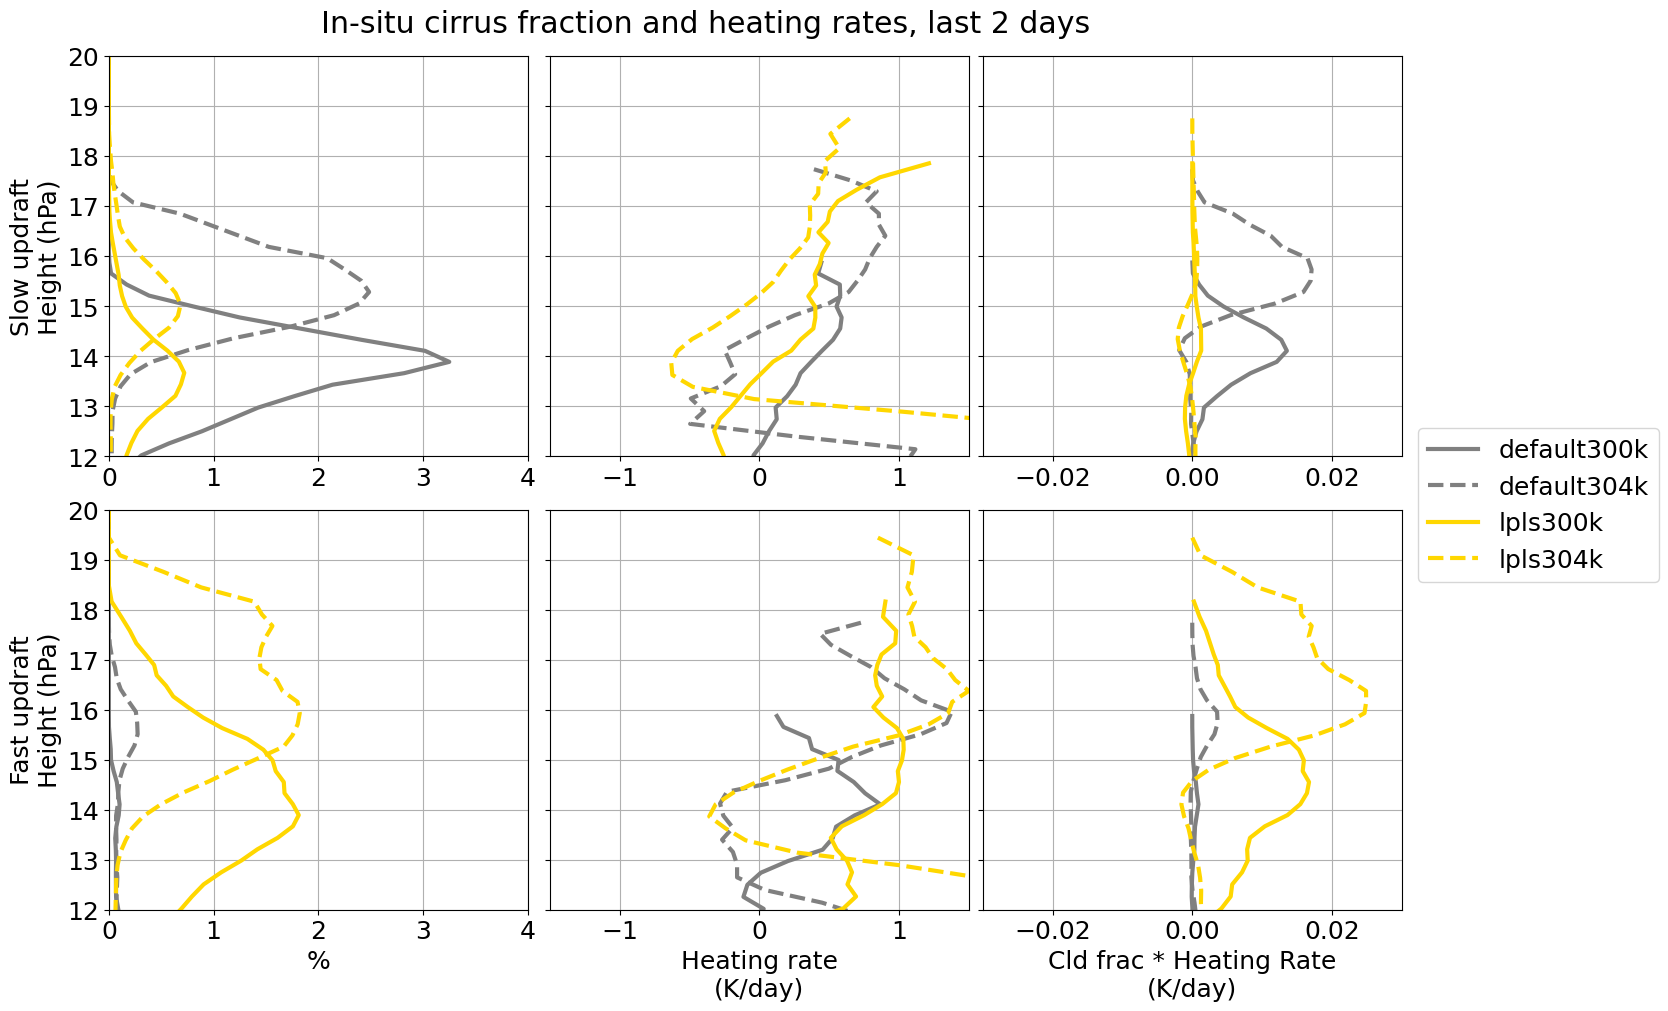

In [15]:
fig, ax = plt.subplots(2,3, figsize=(14,10), layout='constrained', sharey=True)
trop_z = 0
for run in runs:
    print(run)
    run_color=color_dict[run.split("_")[-2]]
    print(run_color)
    ds = xr.open_dataset(f"../stats/insitu_slow_fast_updraft_frac_heating_{run}.nc")
    z = xr.open_dataset(run_dir+f"{run}/run/{run}_Z3_mean.nc").Z3[0,:,0,0]/1000

    # z = ds.lev.values
    if "304" in run:
        ls = "dashed"
    else:
        ls = "solid"
    # trop_z = np.argmin(z)
    ax[0,0].plot((ds.insitu_slow_frac*100)[trop_z:], z[trop_z:], color=run_color, 
               label=run.split("_")[-2],
               lw=3, linestyle=ls)
    ax[1,0].plot((ds.insitu_fast_frac*100)[trop_z:], z[trop_z:], color=run_color, 
               lw=3, linestyle=ls)
    ax[0,1].plot(ds.heating_net_slow[trop_z:], z[trop_z:], color=run_color,
               lw=3, linestyle=ls)
    ax[0,2].plot((ds.heating_net_slow*ds.insitu_slow_frac)[trop_z:], z[trop_z:], color=run_color,
               lw=3, linestyle=ls)
    ax[1,1].plot(ds.heating_net_fast[trop_z:], z[trop_z:], color=run_color,
               lw=3, linestyle=ls)
    ax[1,2].plot((ds.heating_net_fast*ds.insitu_fast_frac)[trop_z:], z[trop_z:], color=run_color,
               lw=3, linestyle=ls)
for i in range(2):
    for j in range(3):
        ax[i,j].grid(True)
ax[1,0].set(xlabel="%", ylabel="Fast updraft\nHeight (hPa)",
            xlim=[0,4],ylim=[12,20]) # [240,180])
ax[0,0].set(xlim=[0,4], ylabel="Slow updraft\nHeight (hPa)")
ax[1,1].set(xlim=[-1.5,1.5], xlabel="Heating rate\n(K/day)")
ax[0,1].set(xlim=[-1.5,1.5])
ax[1,2].set(xlim=[-0.03,0.03], xlabel="Cld frac * Heating Rate\n(K/day)")
ax[0,2].set(xlim=[-0.03,0.03])
ndays = ds.attrs["averaged over n days"]
print(ndays)
fig.suptitle(f"In-situ cirrus fraction and heating rates, last {ndays} days")
fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
savename=f"../plots/large/insitu_detr_vert_heating_allruns_last{ndays}days.png"
plt.savefig(savename, transparent=True, bbox_inches="tight", pad_inches=1)
print("saved as "+savename)
plt.show()

In [11]:
np.argmin(z.values)

38

### timeseries

In [10]:
file = run_dir + run + f"/run/{run}.eam.h0.2000-01-01-00000.nc"
nuc_file = run_dir + run + f"/run/{run}_NUC_hrs.nc"
bcu_file = run_dir + run + f"/run/{run}_BCU_hrs.nc"
print(file)

chunks = {'time':100, 'ncol':16000, 'x':16000}

ice = xr.open_dataset(file, chunks=chunks)[["IWC","T","crm_grid_x","crm_grid_y"]]
x = ice.crm_grid_x.isel(time=0)/1000
y = ice.crm_grid_y.isel(time=0)/1000
print(x.shape, y.shape)

nuc = xr.open_dataset(nuc_file, chunks=chunks).NUC.rename({'x':'ncol'}) #.sel(time=ice.time, method="nearest")
nuc = nuc.where((ice['T']<233.15)&(ice['IWC']>=1e-8))
bcu = xr.open_dataset(bcu_file, chunks=chunks).BCU.rename({'x':'ncol'}) #  .sel(time=ice.time, method="nearest")
print(nuc.dims, bcu.dims, nuc[1].time.values, bcu[1].time.values)
nuc

/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_aa_default/run/dpscream_rce_large_3km_aa_default.eam.h0.2000-01-01-00000.nc
(147456,) (147456,)
('time', 'lev', 'ncol') ('time', 'lev', 'ncol') 2000-01-01 06:00:00 2000-01-01 06:00:00


<xarray.DataArray 'NUC' (time: 201, lev: 128, ncol: 147456)> Size: 15GB
dask.array<where, shape=(201, 128, 147456), dtype=float32, chunksize=(100, 128, 16000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2kB 2000-01-01 00:00:00 ... 2000-02-20 00:00:00
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
Dimensions without coordinates: ncol
Attributes:
    long_name:     Nucleation tracer
    units:         kg/kg
    mdims:         1
    mixing_ratio:  dry
    cell_methods:  time: point

In [11]:
nuc0 = nuc.where(nuc<bcu).count(dim=['lev','ncol'])
bcu0 = nuc.where(bcu<2).count(dim=['lev','ncol'])
nuc0

<xarray.DataArray 'NUC' (time: 201)> Size: 2kB
dask.array<sum-aggregate, shape=(201,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2kB 2000-01-01 00:00:00 ... 2000-02-20 00:00:00

In [12]:
nuc0 = nuc0/(nuc.shape[-1]*nuc.shape[1])
bcu0 = bcu0/(nuc.shape[-1]*nuc.shape[1])
# nuc0 = np.nanmean(np.where(nuc<bcu,1,0), axis=(0,1))
# bcu0 = np.nanmean(np.where(bcu<=0.125,1,0), axis=(0,1))
print(nuc.shape, nuc0.shape, bcu0.shape)  # , nuc2.shape)
nuc0

(201, 128, 147456) (201,) (201,)


<xarray.DataArray 'NUC' (time: 201)> Size: 2kB
dask.array<truediv, shape=(201,), dtype=float64, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2kB 2000-01-01 00:00:00 ... 2000-02-20 00:00:00

In [ ]:
nuc0.compute()
bcu0.compute()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,3), layout='constrained')

nuc0.plot(x='time', ax=ax, color='tab:red', label='NUC')
bcu0.plot(x='time', ax=ax, color='tab:blue', label='BCU')

ax.legend()
ax.grid(True)
plt.show()

[########################################] | 100% Completed | 33m 41s
[###############                         ] | 38% Completed | 439.67 s

### W_NUC and NI_NUC and NI for in-situ vs convective gridboxes

In [ ]:
file = run_dir + run + f"/run/{run}.eam.h0.2000-01-01-00000.nc"
var_name="NI_NUC"
nuc_file = run_dir + run + f"/run/{run}_NUC_hrs.nc"
bcu_file = run_dir + run + f"/run/{run}_BCU_hrs.nc"
var_file = run_dir + run + f"/run/{run}_{var_name}_hrs.nc"
qsmall=1e-8
print(var_name, file)

ice = xr.open_dataset(file, chunks={'x':2000})[["NUMICE","Q","IWC","T"]].isel(time=slice(-ndays*4,-1))
nuc = xr.open_dataset(nuc_file).NUC.rename({'x':'ncol'}).sel(time=ice.time, method="nearest")
bcu = xr.open_dataset(bcu_file).BCU.rename({'x':'ncol'}).sel(time=ice.time, method="nearest")
if var_name!="NI":
    var = xr.open_dataset(var_file, chunks={'x':2000})[var_name].rename({'x':'ncol'}).sel(time=ice.time, method="nearest")
    var = var.where((ice['T']<233.15)&(ice['IWC']>qsmall))
print(nuc.dims, bcu.dims, nuc[1].time.values, bcu[1].time.values)
print(nuc.shape, bcu.shape)
# nuc = nuc.where(nuc<bcu).count(dim=['time','lev'])
# bcu = nuc.where(bcu<2).count(dim=['time','lev'])
if var_name=="NI_NUC":
    var = util.calc_ni(var, ice.Q, ice.lev, ice['T'])/1e6
elif var_name=="NI":
    var = util.calc_ni(ice.NUMICE, ice.Q, ice.lev, ice['T'])/1e6
print(var.shape)
var_insitu = var.where(nuc<bcu)
print(var_insitu.shape)
var_conv = var.where(bcu<2)
print(var_conv.shape)
print("done.")

In [ ]:
fig = plt.figure(figsize=(7,3))
if var_name=="W_NUC":
    var_conv.plot.hist(bins=[0,0.25,0.5,1,2,4,8,16], histtype='step',
                       label='convective', yscale='log', xscale='log', lw=2)
    var_insitu.plot.hist(bins=[0,0.25,0.5,1,2,4,8], histtype='step',
                         label='in-situ', yscale='log', xscale='log', lw=2)
    plt.xlabel("W_NUC (m/s)")
elif var_name=="NI_NUC":
    var_conv.plot.hist(bins=np.logspace(-6,0,30), histtype='step',
                       label='convective', yscale='log', xscale='log', lw=2)
    var_insitu.plot.hist(bins=np.logspace(-6,0,30), histtype='step',
                         label='in-situ', yscale='log', xscale='log', lw=2)
    plt.xlabel("calc ni NUC (#/cm3)")
elif var_name=="NI":
    var_conv.plot.hist(bins=np.logspace(-6,0,30), histtype='step',
                       label='convective', yscale='log', xscale='log', lw=2)
    var_insitu.plot.hist(bins=np.logspace(-6,0,30), histtype='step',
                         label='in-situ', yscale='log', xscale='log', lw=2)
    plt.xlabel("calc ni (#/cm3)")
plt.title(f"{var_name} {(run[-8:])}")  # ({(np.nanmean(var_insitu)):.02f}) m/s")
plt.legend(fontsize=12)
plt.savefig(f"../plots/large/hist_{var_name}_{run}.png")
print('saved')
plt.show()

## 2d vars snapshot - OLR and PW - all simulations

In [40]:
# runs = [["dpscream_rce_large_3km_aa_default","dpscream_rce_large_3km_default300k_branch"],
#         ["dpscream_rce_large_3km_ab_lsascent", "dpscream_rce_large_3km_lsascent300k_branch"],
#         ["dpscream_rce_large_3km_aa_lpfrz", "dpscream_rce_large_3km_lpfrz300k_branch"],
#         ["dpscream_rce_large_3km_lpls300k", None]]
runs = [["dpscream_rce_large_3km_aa_304ksst","dpscream_rce_large_3km_default304k_branch"],
        ["dpscream_rce_large_3km_aa_lsascent_304ksst","dpscream_rce_large_3km_lsascent304k_branch"],
        ["dpscream_rce_large_3km_aa_lpfrz304k", "dpscream_rce_large_3km_lpfrz304k_branch"],
        ["dpscream_rce_large_3km_lpls304k", None]]

In [41]:
ndays = 45
vars=["TMQ","FLUT","crm_grid_x","crm_grid_y"]

RUN: default304k starttime 2000-02-15 00:00:00
(147456,)
[########################################] | 100% Completed | 118.50 ms
[########################################] | 100% Completed | 126.85 ms
[########################################] | 100% Completed | 223.60 ms
[########################################] | 100% Completed | 104.45 ms
[########################################] | 100% Completed | 104.34 ms
[########################################] | 100% Completed | 103.14 ms
[########################################] | 100% Completed | 102.77 ms
[########################################] | 100% Completed | 116.55 ms
[########################################] | 100% Completed | 104.94 ms
[########################################] | 100% Completed | 107.12 ms
[########################################] | 100% Completed | 104.57 ms
[########################################] | 100% Completed | 103.45 ms
RUN: lsascent304k starttime 2000-02-15 00:00:00
(147456,)
[####################

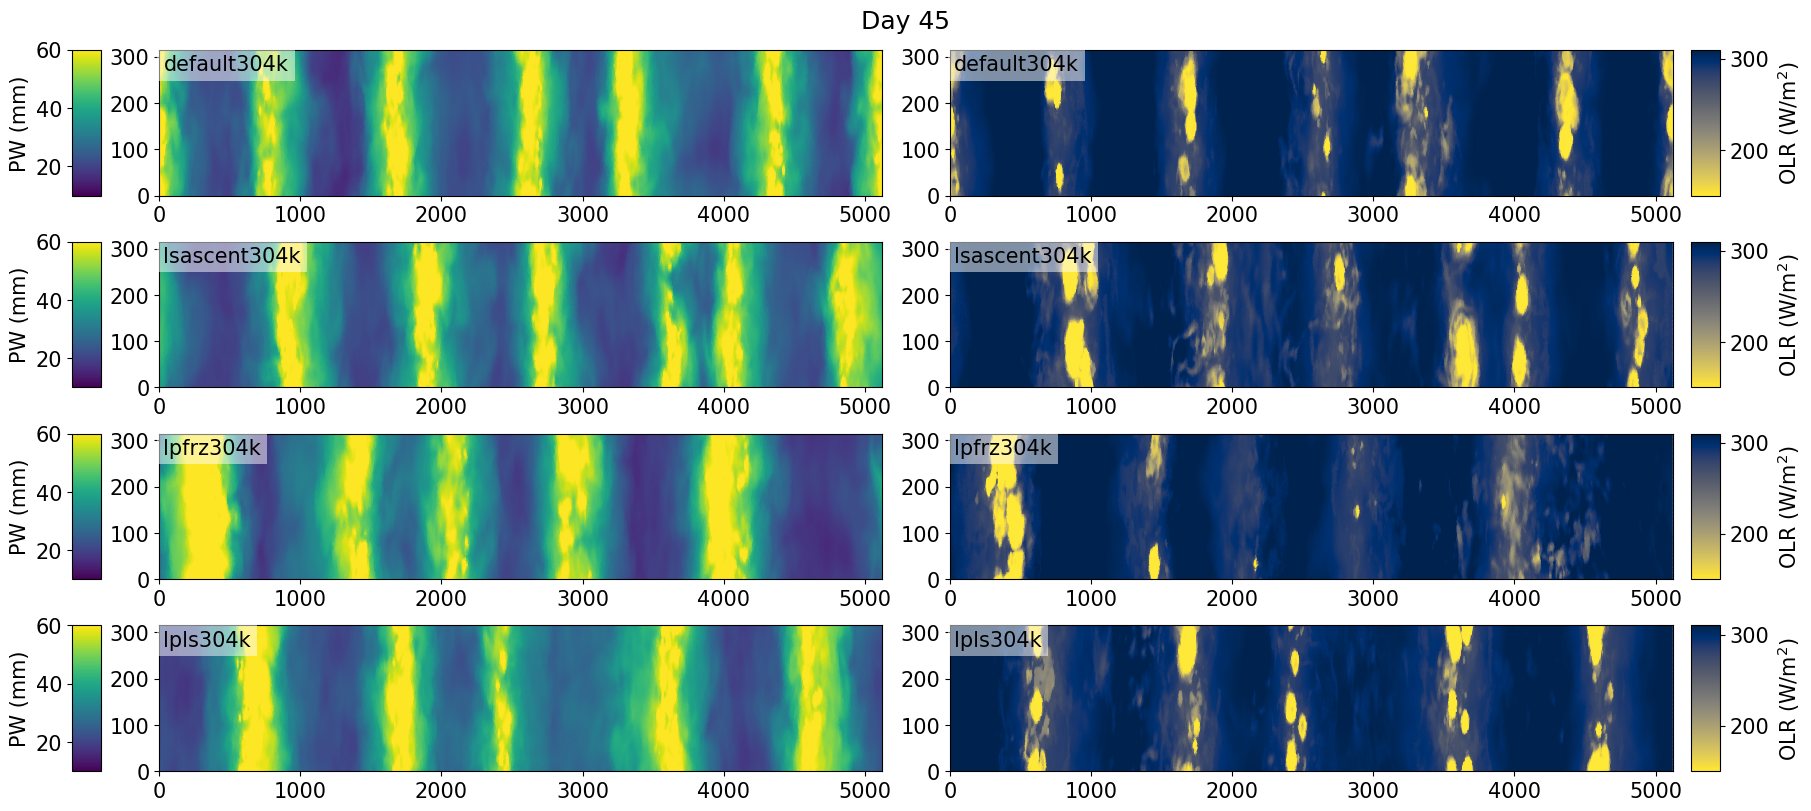

In [42]:
fig = plt.figure(figsize=(18,2*len(runs)), layout='constrained')
gs = GridSpec(len(runs), 4, figure=fig, width_ratios=[4,100,100,4], hspace=0)
savename=""
plt.rcParams['font.size']=15
for i,run in enumerate(runs):
    if run[1] is not None:
        run_name = run[1].split("_")[-2]
    else:
        run_name = run[0][-8:]
    if run[1] is None:
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc"]
    elif run[1].split("_")[-2][:3]=="def":
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc",
                 run_dir+f"{run[1]}/run/{run[1]}.eam.h1.2000-02-20-03600.nc"]
    elif run[1].split("_")[-2]=="lpfrz304k":
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc",
                 run_dir+f"{run[1]}/run/{run[1]}.eam.h1.2000-02-10-10800.nc"]
    else:
        files = [run_dir+f"{run[0]}/run/{run[0]}.eam.h1.2000-01-01-00000.nc",
                 run_dir+f"{run[1]}/run/{run[1]}.eam.h1.2000-02-20-10800.nc"]
    ds = xr.open_mfdataset(files)[vars]
    t_snap = ds.time[0].values + timedelta(days=ndays)
    print("RUN:", run_name, "starttime", t_snap)
    ds = ds.sel(time=t_snap, method="nearest")
    print(ds.TMQ.shape)

    x = ds.crm_grid_x/1000
    y = ds.crm_grid_y/1000
    
    cax0 = fig.add_subplot(gs[i,0])
    ax0 = fig.add_subplot(gs[i,1])
    im = ax0.tripcolor(y, x, ds["TMQ"].T,
                       vmin=10, vmax=60,
                       shading="gouraud", cmap="viridis")
    plt.colorbar(im, label="PW (mm)", cax=cax0, shrink=0.8, location="left")
    ax1 = fig.add_subplot(gs[i,2])
    cax1 = fig.add_subplot(gs[i,3])
    im = ax1.tripcolor(y, x, (ds["FLUT"].T),
                       vmin=150, vmax=310,
                       shading="gouraud", cmap="cividis_r")
    plt.colorbar(im, label="OLR (W/m$^2$)", cax=cax1, shrink=0.8)
    ax0.set(xlim=[0,5120], ylim=[0,315],
            xticks=np.arange(0,5120,1000),
            yticks=np.arange(0,320,100))
    ax1.set(xlim=[0,5120], ylim=[0,315],
            xticks=np.arange(0,5120,1000),
            yticks=np.arange(0,320,100))
    ax0.text(30, 305, run_name,
            ha="left", va="top", size=15,
            bbox=dict(boxstyle="square,pad=0.3",
                      fc=(1,1,1,0.5), ec="none"))
    ax1.text(30, 305, run_name,
            ha="left", va="top", size=15,
            bbox=dict(boxstyle="square,pad=0.3",
                      fc=(1,1,1,0.5), ec="none"))
    savename+=run_name
savetime = str(ds.time.values).replace(" ","T")
fig.suptitle("Day "+str(ndays))
plt.savefig(f"../plots/large/OLR_PW_{savename}_{savetime}.pdf")
plt.show()


## 2d vars snapshot - 5 panels

In [16]:
ds = xr.open_dataset(file, chunks={'x':2000})[vars].isel(time=10)  # .isel(time=slice(-120,-1))
ice = xr.open_dataset(file.replace("h1","h0").replace("10800","21600"), chunks={'x':2000})[["IWC","T"]].sel(time=ds.time, method="nearest")
# ice.time[0], ds.time[0], ice.time[1], ds.time[1]


In [29]:
# ndays = 13
for ndays in [59]:
    vars = ["TMQ","FLUT","LHFLX","SHFLX","PRECC","PRECL","TGCLDIWP","crm_grid_x","crm_grid_y"]
    var_units = ["kg/m2","W/m2","W/m2","W/m2","m/s","m/s"]
    if ndays < 50:
        nuc_file = run_dir + run + f"/run/{run}_NUC_hrs.nc"
        bcu_file = run_dir + run + f"/run/{run}_BCU_hrs.nc"
        t3d = 4 * ndays
    else:
        nuc_file = run_dir + run + f"/run/{run}_NUC_hrs.nc"
        bcu_file = run_dir + run + f"/run/{run}_BCU_hrs.nc"
        if run.split("_")[-2]=="lpfrz304k":
            t3d = (ndays-40)*4
        else:
            t3d = (ndays-50)*4
    print(file)
    print(t3d, ndays)
    
    x = ds.crm_grid_x/1000
    y = ds.crm_grid_y/1000
    
    ice = xr.open_dataset(file.replace("h1","h0").replace("10800","21600"), chunks={'x':2000}).isel(time=t3d)[["IWC","T"]]
    ds = xr.open_dataset(file, chunks={'x':2000})[vars].sel(time=ice.time, method="nearest")  # .isel(time=slice(-120,-1))

    print(ice.time.values, ds.time.values)
    # nuc = xr.open_dataset(nuc_file).NUC.isel(time=t3d)#.rename({'x':'ncol'})
    # print(nuc.shape)
    # print(nuc.dims, ice.dims)
    # # nuc = nuc.where((ice['T']<233.15)&(ice['IWC']>=1e-8))
    # nuc = nuc.where((ice['T']<213.15)&(ice['IWC']>=1e-8))
    # print(nuc.shape)
    # bcu = xr.open_dataset(bcu_file).BCU.isel(time=t3d)#.rename({'x':'ncol'})
    # nuc0hrs = nuc.where(bcu<2).mean(dim=['lev'])
    # nuc2hrs = nuc.where((bcu>=2)&(bcu<5)).mean(dim=['lev'])
    # nuc5hrs = nuc.where((bcu>=5)&(bcu<50)).mean(dim=['lev'])
    # nuc50hrs = nuc.where(bcu>=50).mean(dim=['lev'])
    # print(nuc.shape, nuc0hrs.shape, nuc2hrs.shape, nuc5hrs.shape, nuc50hrs.shape)
    
    # do it only 60 at a time to not go over the memory limit
    # for t in range(10,110):  # range(len(olr.time)-2):
    print(t, end="... ")
    fig = plt.figure(figsize=(15,20), layout='constrained')
    gs = GridSpec(7, 2, figure=fig, width_ratios=[100,4], hspace=0)
    ax0 = fig.add_subplot(gs[0,0])
    cax0 = fig.add_subplot(gs[0,1])
    im = ax0.tripcolor(y, x, ds["TMQ"].T,
                       vmin=10, vmax=60,
                       shading="gouraud", cmap="viridis")
    plt.colorbar(im, label="PW (mm)", cax=cax0, shrink=0.8)
    ax1 = fig.add_subplot(gs[1,0])
    cax1 = fig.add_subplot(gs[1,1])
    im = ax1.tripcolor(y, x, (ds["FLUT"].T),
                       vmin=150, vmax=310,
                       shading="gouraud", cmap="cividis_r")
    plt.colorbar(im, label="OLR (W/m$^2$)", cax=cax1, shrink=0.8)
    ax2 = fig.add_subplot(gs[2,0])
    cax2 = fig.add_subplot(gs[2,1])
    im = ax2.tripcolor(y, x, (np.log10(ds["TGCLDIWP"]*1000).T),
                       vmin=-4, vmax=4,
                       shading="gouraud", cmap="YlGnBu_r")
    plt.colorbar(im, label="log10(IWP (g/m$^2$)", cax=cax2, shrink=0.8)
    # ax3 = fig.add_subplot(gs[3,0])
    # cax3 = fig.add_subplot(gs[3,1])
    # im = ax3.tripcolor(y, x, nuc0hrs,
    #                    vmin=0, vmax=6,
    #                    shading="gouraud", cmap="gnuplot")
    # plt.colorbar(im, label="NUC (hrs)",
    #              cax=cax3, shrink=0.8, extend='max')
    # ax4 = fig.add_subplot(gs[4,0])
    # cax4 = fig.add_subplot(gs[4,1])
    # im = ax4.tripcolor(y, x, nuc2hrs,
    #                    vmin=0, vmax=6,
    #                    shading="gouraud", cmap="gnuplot")
    # plt.colorbar(im, label="NUC (hrs)",
    #              cax=cax4, shrink=0.8, extend='max')
    # ax5 = fig.add_subplot(gs[5,0])
    # cax5 = fig.add_subplot(gs[5,1])
    # im = ax5.tripcolor(y, x, nuc5hrs,
    #                    vmin=0, vmax=6,
    #                    shading="gouraud", cmap="gnuplot")
    # plt.colorbar(im, label="NUC (hrs)",
    #              cax=cax5, shrink=0.8, extend='max')
    # ax6 = fig.add_subplot(gs[6,0])
    # cax6 = fig.add_subplot(gs[6,1])
    # im = ax6.tripcolor(y, x, nuc50hrs,
    #                    vmin=0, vmax=6,
    #                    shading="gouraud", cmap="gnuplot")
    # plt.colorbar(im, label="NUC (hrs)",
    #              cax=cax6, shrink=0.8, extend='max')
    
    ax0.set(ylabel="PW\nkm", xlim=[0,5120], ylim=[0,320])
    ax1.set(ylabel="OLR\nkm", xlim=[0,5120], ylim=[0,320])
    ax2.set(ylabel="IWP\nkm", xlim=[0,5120], ylim=[0,320])
    # ax3.set(ylabel="$\{tau}_{conv}<2$\nkm", xlim=[0,5120], ylim=[0,320])
    # ax4.set(ylabel="$2\leq \{tau}_{conv}<5$\nkm", xlim=[0,5120], ylim=[0,320])
    # ax5.set(ylabel="$5\leq \{tau}_{conv}<50$\nkm", xlim=[0,5120], ylim=[0,320])
    # ax6.set(ylabel="$\{tau}_{conv}>50$\nkm",xlabel="km",
    #         xlim=[0,5120], ylim=[0,320])
    fig.suptitle(f"{ds.time.values}")
    savetime=(str(ice.time.values).replace(" ","T").split(":")[0])
    savename=f"../plots/large/vars2d_cirrustemps_{run}_{(savetime)}.png"
    plt.savefig(savename)
    print("saved as "+savename)
    plt.close()

/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscream_rce_large_3km_lsascent300k_branch/run/dpscream_rce_large_3km_lsascent300k_branch.eam.h1.2000-02-20-10800.nc
36 59
2000-03-01 06:00:00 2000-03-01 06:00:00
[########################################] | 100% Completed | 102.14 ms
[########################################] | 100% Completed | 104.77 ms
[########################################] | 100% Completed | 102.68 ms
[########################################] | 100% Completed | 121.06 ms
[########################################] | 100% Completed | 103.30 ms
[########################################] | 100% Completed | 118.47 ms
[########################################] | 100% Completed | 103.34 ms
[########################################] | 100% Completed | 104.60 ms
[########################################] | 100% Completed | 103.23 ms
[########################################] | 100% Completed | 104.92 ms
[########################################] | 100% Completed |

In [ ]:

# # do it only 60 at a time to not go over the memory limit
# # for t in range(17,110):  # range(len(olr.time)-2):
# print(t, end="... ")
# fig = plt.figure(figsize=(15,20), layout='constrained')
# gs = GridSpec(6, 2, figure=fig, width_ratios=[100,4], hspace=0)
# ax0 = fig.add_subplot(gs[0,0])
# cax0 = fig.add_subplot(gs[0,1])
# im = ax0.tripcolor(y, x, ds["TMQ"].T,
#                    vmin=10, vmax=60,
#                    shading="gouraud", cmap="viridis")
# plt.colorbar(im, label="PW (mm)", cax=cax0, shrink=0.8)
# ax1 = fig.add_subplot(gs[1,0])
# cax1 = fig.add_subplot(gs[1,1])
# im = ax1.tripcolor(y, x, (ds["FLUT"].T),
#                    vmin=150, vmax=310,
#                    shading="gouraud", cmap="viridis")
# plt.colorbar(im, label="FLUT (W/m2)", cax=cax1, shrink=0.8)
# ax2 = fig.add_subplot(gs[2,0])
# cax2 = fig.add_subplot(gs[2,1])
# im = ax2.tripcolor(y, x, ((ds["LHFLX"]+ds["SHFLX"]).T),
#                    vmin=60, vmax=140,
#                    shading="gouraud", cmap="viridis")
# plt.colorbar(im, label="THF (W/m2)", cax=cax2, shrink=0.8)
# ax3 = fig.add_subplot(gs[3,0])
# cax3 = fig.add_subplot(gs[3,1])
# im = ax3.tripcolor(y, x, ((ds["PRECC"]+ds["PRECL"]).T)*(3600*24*1000),
#                    vmin=60, vmax=100,
#                    shading="gouraud", cmap="viridis")
# plt.colorbar(im, label="PREC (mm/day)", cax=cax3, shrink=0.8)
# ax4 = fig.add_subplot(gs[4,0])
# cax4 = fig.add_subplot(gs[4,1])
# im = ax4.tripcolor(y, x, (np.log10(ds["TGCLDIWP"]*1000).T),
#                    vmin=-4, vmax=4,
#                    shading="gouraud", cmap="viridis")
# plt.colorbar(im, label="log10(IWP (g/m3))", cax=cax4, shrink=0.8)
# ax5 = fig.add_subplot(gs[5,0])
# cax5 = fig.add_subplot(gs[5,1])
# im = ax5.tripcolor(y, x, nuc,
#                    vmin=0, vmax=12,
#                    shading="gouraud", cmap="terrain")
# plt.colorbar(im, label="NUC > BCU (T<-40$^\circ$C & cldy)",
#              cax=cax5, shrink=0.8, extend='max')

# ax0.set(ylabel="km", xlim=[0,5120], ylim=[0,320])
# ax1.set(ylabel="km", xlim=[0,5120], ylim=[0,320])
# ax2.set(ylabel="km", xlim=[0,5120], ylim=[0,320])
# ax3.set(ylabel="km", xlim=[0,5120], ylim=[0,320])
# ax4.set(xlabel="km", xlim=[0,5120], ylim=[0,320])
# ax5.set(xlabel="km",ylabel="km",
#         xlim=[0,5120], ylim=[0,320])
# fig.suptitle(f"{ds.time.values}")
# savename=f"../plots/large/vars2d_pw_olr_prec_thf_iwp_nuc_t{t:03d}.png"
# plt.savefig(savename)
# print("saved as "+savename)
# plt.show()


# scatter plot Water Vapor Path


## TTL IWP all

In [2]:
run_list = ['dpscream_rce_large_3km_b_default300k_wbranch',
            'dpscream_rce_large_3km_d_default304k_wbranch',
            'dpscream_rce_large_3km_lsascent300k_branch',
            'dpscream_rce_large_3km_lsascent304k_branch',
            'dpscream_rce_large_3km_lpfrz300k_branch',
            'dpscream_rce_large_3km_lpfrz304k_branch',
            'dpscream_rce_large_3km_b_lpls300k_wbranch',
            'dpscream_rce_large_3km_d_lpls304k_wbranch']

0 dpscream_rce_large_3km_b_default300k_wbranch 14 km 46 18 km 28
1 dpscream_rce_large_3km_d_default304k_wbranch 14 km 48 18 km 30
2 dpscream_rce_large_3km_lsascent300k_branch 14 km 46 18 km 28
3 dpscream_rce_large_3km_lsascent304k_branch 14 km 47 18 km 30
4 dpscream_rce_large_3km_lpfrz300k_branch 14 km 46 18 km 28
5 dpscream_rce_large_3km_lpfrz304k_branch 14 km 48 18 km 30
6 dpscream_rce_large_3km_b_lpls300k_wbranch 14 km 46 18 km 28
7 dpscream_rce_large_3km_d_lpls304k_wbranch 14 km 47 18 km 30


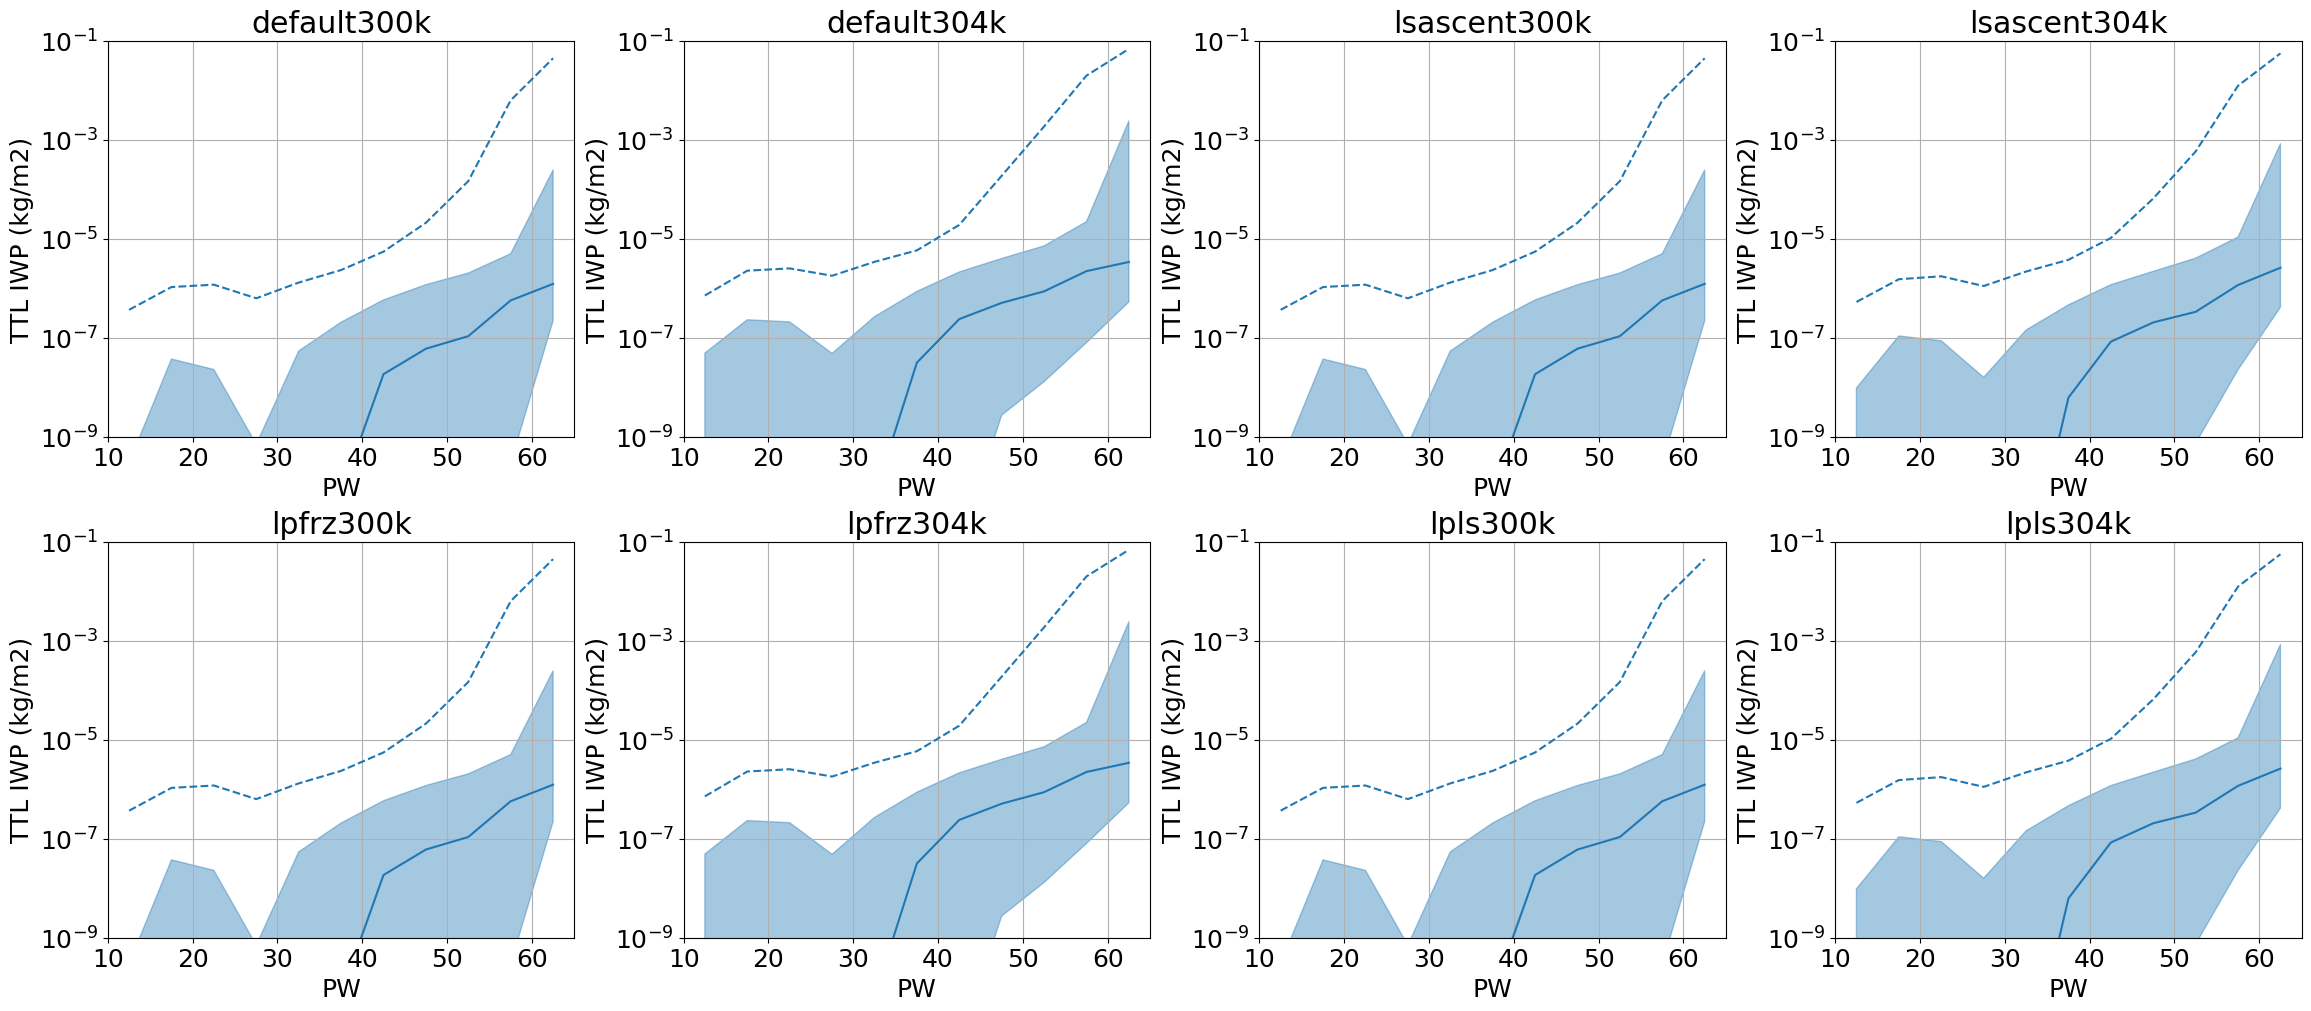

In [5]:
pw_vals = np.arange(15,66,5)

fig = plt.figure(figsize=(23,10), layout='constrained')
for i,run in enumerate(run_list):
    ax = fig.add_subplot(2,4,i+1)
    ds = xr.open_dataset(file)[['TMQ','IWC']].isel(time=slice(-16,-1))
    z = xr.open_dataset(f'{run_dir}/{run}/run/{run}_Z3_mean.nc').Z3.values
    z14 = np.argmin(abs(z-14000))
    z18 = np.argmin(abs(z-18000))
    print(i, run, '14 km', z14, '18 km', z18)
    ttl_cld = ds.IWC.isel(lev=slice(z18,z14)).integrate('lev')
    # ttl_cld = np.where(ttl_cld>qsmall, 1, 0)
    p0=10
    y05=np.zeros(len(pw_vals))
    y25=np.zeros(len(pw_vals))
    y50=np.zeros(len(pw_vals))
    y75=np.zeros(len(pw_vals))
    y95=np.zeros(len(pw_vals))
    for j,p in enumerate(pw_vals):
        y05[j] = ttl_cld.where((ds.TMQ>=p0) & (ds.TMQ<p)).quantile(0.05)
        y25[j] = ttl_cld.where((ds.TMQ>=p0) & (ds.TMQ<p)).quantile(0.25)
        y50[j] = ttl_cld.where((ds.TMQ>=p0) & (ds.TMQ<p)).median()
        y75[j] = ttl_cld.where((ds.TMQ>=p0) & (ds.TMQ<p)).quantile(0.75)
        y95[j] = ttl_cld.where((ds.TMQ>=p0) & (ds.TMQ<p)).quantile(0.95)
        p0=p
    ax.plot(pw_vals-2.5, y05, color='C0', linestyle='dashed')
    ax.plot(pw_vals-2.5, y95, color='C0', linestyle='dashed')
    ax.fill_between(pw_vals-2.5, y25, y75, alpha=0.4, color='C0')
    ax.plot(pw_vals-2.5, y50, color='C0')
    ax.set(xlabel='PW', ylabel='TTL IWP (kg/m2)', title=run.split('_')[-2])
    ax.set(xlim=[10,65])
    ax.set(yscale='log', ylim=[1e-9,0.1])
    ax.grid(True)
plt.savefig('../plots/large/scatter_TMQ_quantiles_TTLcld.png')
plt.show()
    

## TTL in situ cld frac? 

In [14]:
run_list = ['dpscream_rce_large_3km_b_default300k_wbranch',
            'dpscream_rce_large_3km_d_default304k_wbranch',
            'dpscream_rce_large_3km_b_lpls300k_wbranch',
            'dpscream_rce_large_3km_d_lpls304k_wbranch']

0 dpscream_rce_large_3km_b_default300k_wbranch 14 km 46 18 km 28
insitu shape (31, 147456) sum 1156188 mean 0.25293231266801075
pw shape (31, 147456)
10 to 15 mm, mean insitu 0.00642422365031362
15 to 20 mm, mean insitu 0.040447276125672046
20 to 25 mm, mean insitu 0.06037930177531362
25 to 30 mm, mean insitu 0.05306536493335574
30 to 35 mm, mean insitu 0.04269463870687724
35 to 40 mm, mean insitu 0.028643426929323475
40 to 45 mm, mean insitu 0.017697132616487456
45 to 50 mm, mean insitu 0.003135325660842294
50 to 55 mm, mean insitu 0.0003386466733870968
55 to 60 mm, mean insitu 0.00010172526041666667
60 to 65 mm, mean insitu 5.250336021505377e-06
1 dpscream_rce_large_3km_d_default304k_wbranch 14 km 48 18 km 30
insitu shape (31, 147456) sum 2354926 mean 0.5151730335741488
pw shape (31, 147456)
10 to 15 mm, mean insitu 0.011790723356294802
15 to 20 mm, mean insitu 0.07411089934755824
20 to 25 mm, mean insitu 0.10812498249887993
25 to 30 mm, mean insitu 0.0848554932515681
30 to 35 mm, me

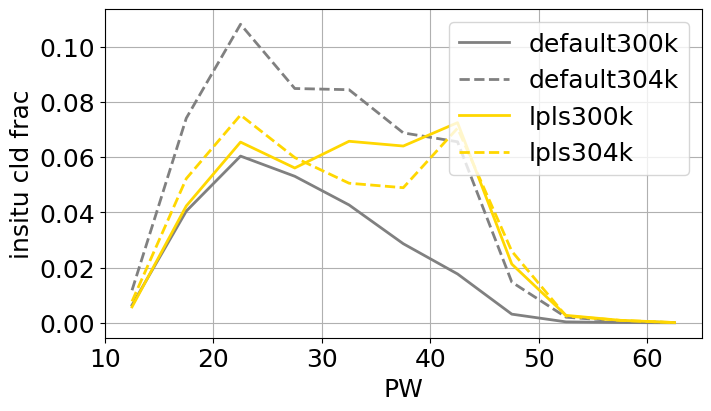

In [40]:
pw_vals = np.arange(15,66,5)

fig = plt.figure(figsize=(7,4), layout='constrained')
ax = fig.add_subplot(1,1,1)

for i,run in enumerate(run_list):
    ds = xr.open_dataset(file)[['TMQ','IWC']].isel(time=slice(-32,-1))
    z = xr.open_dataset(f'{run_dir}/{run}/run/{run}_Z3_mean.nc').Z3.values
    z14 = np.argmin(abs(z-14000))
    z18 = np.argmin(abs(z-18000))
    nuc = xr.open_dataset(f'{run_dir}/{run}/run/{run}_NUC_hrs.nc').NUC.sel(time=ds.time, method='nearest').isel(lev=slice(z18,z14)).values
    bcu = xr.open_dataset(f'{run_dir}/{run}/run/{run}_BCU_hrs.nc').BCU.sel(time=ds.time, method='nearest').isel(lev=slice(z18,z14)).values
    print(i, run, '14 km', z14, '18 km', z18)
    ttl_cld = ds.IWC.isel(lev=slice(z18,z14))
    pw = ds.TMQ.values
    insitu = np.where((bcu>24)&(nuc<bcu)&(ttl_cld>qsmall),1,0)
    insitu = np.count_nonzero(insitu, axis=1)
    print('insitu shape', insitu.shape, 'sum', np.sum(insitu), 'mean', np.mean(insitu))
    print('pw shape', pw.shape)
    # ttl_cld = np.where(ttl_cld>qsmall, 1, 0)
    p0=10
    y50=np.zeros(len(pw_vals))
    for j,p in enumerate(pw_vals):
        y50[j] = np.mean(np.where((pw>=p0) & (pw<p), insitu, 0))
        print(p0,'to',p,'mm, mean insitu',y50[j])
        p0=p
    if '304' in run:
        ls='dashed'
    else:
        ls='solid'
    ax.plot(pw_vals-2.5, y50, color=color_dict[run.split('_')[-2]], 
            label=run.split('_')[-2], lw=2, linestyle=ls)
    ax.set(xlabel='PW', ylabel='insitu cld frac')
    ax.set(xlim=[10,65])
    # ax.set(yscale='log', ylim=[1e-9,0.1])
    ax.grid(True)
    ax.legend()
plt.savefig('../plots/large/scatter_TMQ_quantiles_TTLcld.png')
plt.show()
    

## 2D vars

In [29]:
var_list = ['CAPE','FLUT','FLUTC','TREFHT','TGCLDIWP','TGCLDLWP','LWCF','SWCF']
var_names = ['CAPE', 'OLR','Clear sky OLR', 'T at ref height', 'IWP', 'LWP','LW CRE', 'SW CRE']
ds = xr.open_dataset(file.split('h0')[0]+'h1.2000-02-20-03600.nc')[var_list+['TMQ']].isel(time=slice(-100,-1))
ds

<xarray.Dataset> Size: 526MB
Dimensions:   (time: 99, ncol: 147456)
Coordinates:
  * time      (time) object 792B 2000-02-20 21:00:00 ... 2000-02-24 23:00:00
Dimensions without coordinates: ncol
Data variables:
    CAPE      (time, ncol) float32 58MB ...
    FLUT      (time, ncol) float32 58MB ...
    FLUTC     (time, ncol) float32 58MB ...
    TREFHT    (time, ncol) float32 58MB ...
    TGCLDIWP  (time, ncol) float32 58MB ...
    TGCLDLWP  (time, ncol) float32 58MB ...
    LWCF      (time, ncol) float32 58MB ...
    SWCF      (time, ncol) float32 58MB ...
    TMQ       (time, ncol) float32 58MB ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         a10df24500
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/work/sturbeville/E3SM/inputdata/atm/cam/inic/ho...
    topography_file:   /glade/work/sturbeville/E3SM/inputdata/atm/cam/topo/US...
    time_period_freq:  hour_1

In [30]:
# ds.TMQ.min().values, ds.TMQ.max().values
pw_vals = np.arange(15,66,5)

0 CAPE
1 OLR
2 Clear sky OLR
3 T at ref height
4 IWP
5 LWP
6 LW CRE
7 SW CRE


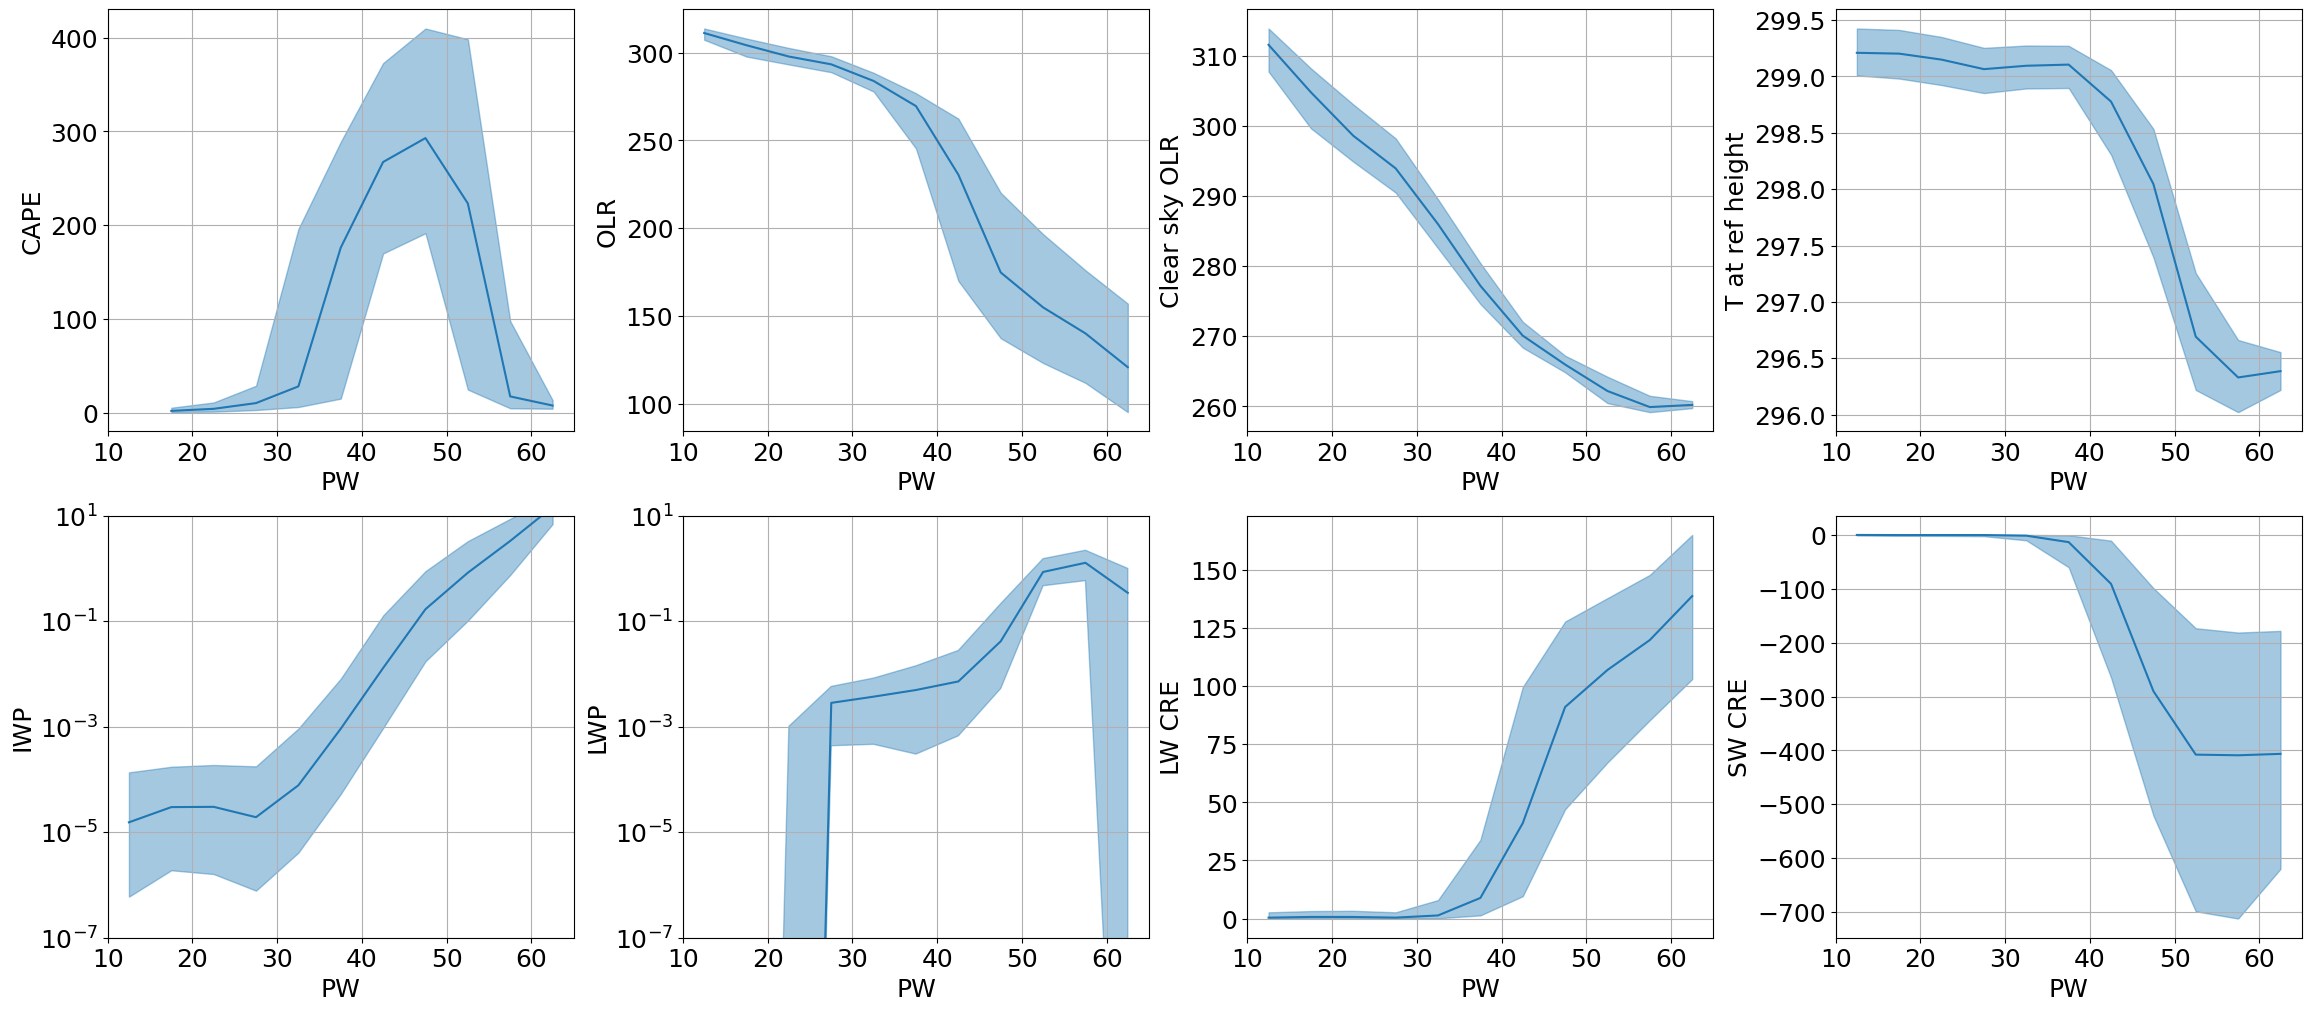

In [31]:
fig = plt.figure(figsize=(23,10), layout='constrained')
for i in range(len(var_names)):
    print(i, var_names[i])
    ax = fig.add_subplot(2,4,i+1)
    # ax.scatter(ds.TMQ[::3,::100], ds[var_list[i]][::3,::100], alpha=0.25)
    p0=10
    y25=np.zeros(len(pw_vals))
    y50=np.zeros(len(pw_vals))
    y75=np.zeros(len(pw_vals))
    for j,p in enumerate(pw_vals):
        y25[j] = ds[var_list[i]].where((ds.TMQ>=p0) & (ds.TMQ<p) & (abs(ds[var_list[i]])>0)).quantile(0.25)
        y50[j] = ds[var_list[i]].where((ds.TMQ>=p0) & (ds.TMQ<p) & (abs(ds[var_list[i]])>0)).median()
        y75[j] = ds[var_list[i]].where((ds.TMQ>=p0) & (ds.TMQ<p) & (abs(ds[var_list[i]])>0)).quantile(0.75)
        p0=p
    ax.fill_between(pw_vals-2.5, y25, y75, alpha=0.4, color='C0')
    ax.plot(pw_vals-2.5, y50, color='C0')
    ax.set(xlabel='PW', ylabel=var_names[i])
    ax.set(xlim=[10,65])
    if var_names[i][-2:]=="WP":
        ax.set(yscale='log', ylim=[1e-7,10])
    ax.grid(True)
plt.savefig('../plots/large/scatter_TMQ_quantiles_var_list.png')
plt.show()
    

# histograms

### PW histograms

In [23]:
run_list = [
            # 'dpscream_rce_large_3km_b_default300k_wbranch',
            # 'dpscream_rce_large_3km_d_default304k_wbranch',
            'dpscream_rce_large_3km_lsascent300k_branch',
            'dpscream_rce_large_3km_lsascent304k_branch',
            # 'dpscream_rce_large_3km_lpfrz300k_branch',
            # 'dpscream_rce_large_3km_lpfrz304k_branch',
            'dpscream_rce_large_3km_b_lpls300k_wbranch',
            'dpscream_rce_large_3km_d_lpls304k_wbranch',
            'dpscream_rce_large_3km_lpls300k_no_max_total_ni_a'
           ]
pw_vals = np.logspace(-4.5,3,40)  # np.arange(6,66,2)

dpscream_rce_large_3km_lsascent300k_branch 8390384
dpscream_rce_large_3km_lsascent304k_branch 8927982
dpscream_rce_large_3km_b_lpls300k_wbranch 7804609
dpscream_rce_large_3km_d_lpls304k_wbranch 8841117
dpscream_rce_large_3km_lpls300k_no_max_total_ni_a 17758888


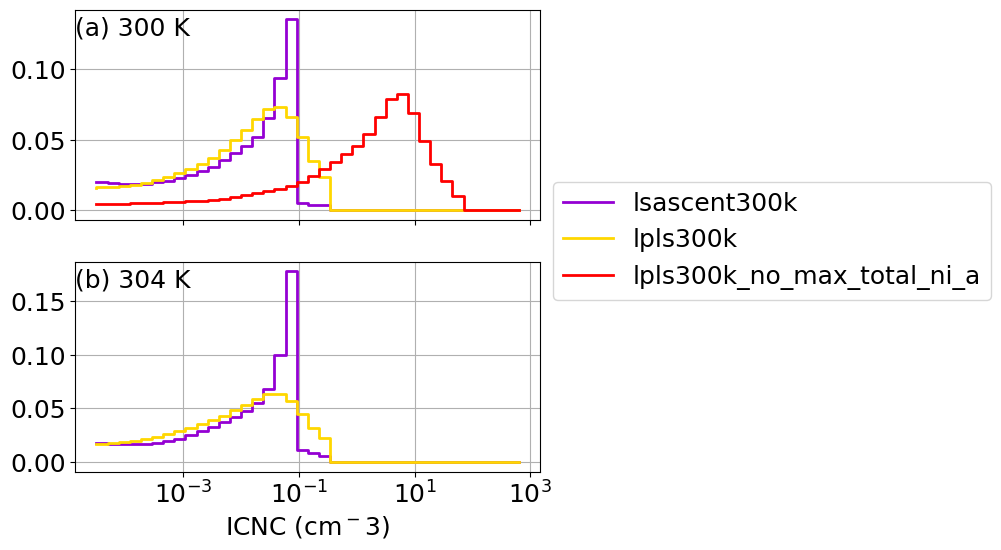

In [25]:
fig, ax = plt.subplots(2,1,figsize=(6,6), sharex=True)
for run in run_list:
    for x in os.listdir(run_dir+run+"/run/"):
                file_name_start = run+".eam.h0"
                if x.startswith(file_name_start):
                    file = run_dir+run+"/run/"+x
    ds = xr.open_dataset(file)[['NUMICE','Q','T']].isel(time=slice(-5,-1))  # ['TMQ']
    # nuc = xr.open_dataset(file.split('.eam')[0]+'_NUC_hrs.nc')['NUC'].sel(time=ds.time, method='nearest')
    # ds = ds.where(nuc<2)
    ni = util.calc_ni(ds.NUMICE, ds.Q, ds.lev*100, ds["T"])
    n = ds.NUMICE.where(ds.NUMICE>=1e-4).count().values
    print(run, n)
    # print(ni)

    if "304" in run:
        ls='solid'
        ax_plot = ax[1]
    else:
        ls='solid'
        ax_plot = ax[0]
    hist, _ = np.histogram(ni, bins=list(pw_vals))
    hist = hist/n
    cd_name = run[23:].split('_wbranch')[0].split('_branch')[0]
    if run[24]=='_':
        cd_name = cd_name[2:]
    cd = color_dict[cd_name]
    ax_plot.step(pw_vals[:-1], hist, where='pre',
                 label=cd_name,
                 color=cd,
                 linestyle=ls, lw=2, alpha=1)
    # ni.plot.hist(bins=list(pw_vals), density=False, ax=ax_plot,
    #              histtype='step', label=run.split('_')[-2][:-4],
    #              color=color_dict[run.split('_')[-2]],
    #              linestyle=ls, lw=2, alpha=1)
ax[0].legend(loc=6, bbox_to_anchor=(1,-0.1))
ax[0].set(xlabel='',xscale='log')
ax[1].set(xlabel='ICNC (cm$^-3$)')
ax[0].grid(True)
ax[1].grid(True)
ax[0].annotate('(a) 300 K', xy=(0,0.88), xycoords='axes fraction')
ax[1].annotate('(b) 304 K', xy=(0,0.88), xycoords='axes fraction')
plt.savefig('../plots/large/hist_icnc_ls300k-304k_norm.png', bbox_inches='tight', pad_inches=0.6)
plt.show()

### freezing processes histogram (freezing rates???)

In [2]:
run = 'dpscream_rce_large_3km_lpfrz300k_branch'
file = f'{run_dir}/{run}/run/{run}.eam.h0.2000-02-20-21600.nc'
ds = xr.open_dataset(file)[['P3_nnuc','P3_nnuc_dep','P3_nnuc_hom','P3_nnuc_imm','P3_nnuc_mix','T','IWC']]
ds = ds.where((ds['T']<233.15) & (ds.IWC>qsmall))
ds

<xarray.Dataset> Size: 21GB
Dimensions:      (time: 40, lev: 128, ncol: 147456)
Coordinates:
  * lev          (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 991.0 994.9 998.5
  * time         (time) object 320B 2000-02-20 06:00:00 ... 2000-03-02 00:00:00
Dimensions without coordinates: ncol
Data variables:
    P3_nnuc      (time, lev, ncol) float32 3GB nan nan nan nan ... nan nan nan
    P3_nnuc_dep  (time, lev, ncol) float32 3GB nan nan nan nan ... nan nan nan
    P3_nnuc_hom  (time, lev, ncol) float32 3GB nan nan nan nan ... nan nan nan
    P3_nnuc_imm  (time, lev, ncol) float32 3GB nan nan nan nan ... nan nan nan
    P3_nnuc_mix  (time, lev, ncol) float32 3GB nan nan nan nan ... nan nan nan
    T            (time, lev, ncol) float32 3GB nan nan nan nan ... nan nan nan
    IWC          (time, lev, ncol) float32 3GB nan nan nan nan ... nan nan nan
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         1a788d1576
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/work/sturbeville/E3SM/inputdata/atm/cam/inic/ho...
    topography_file:   /glade/work/sturbeville/E3SM/inputdata/atm/cam/topo/US...
    time_period_freq:  hour_6

In [3]:
nnuc_vals = np.logspace(-5,2,45)
hist, _ = np.histogram(ds.P3_nnuc, bins=list(nnuc_vals))
n = ds.P3_nnuc.where(ds.P3_nnuc>=1e-5).count().values
hist = hist/n

cd_name = run[23:].split('_wbranch')[0].split('_branch')[0]
if run[24]=='_':
    cd_name = cd_name[2:]
cd = color_dict[cd_name]

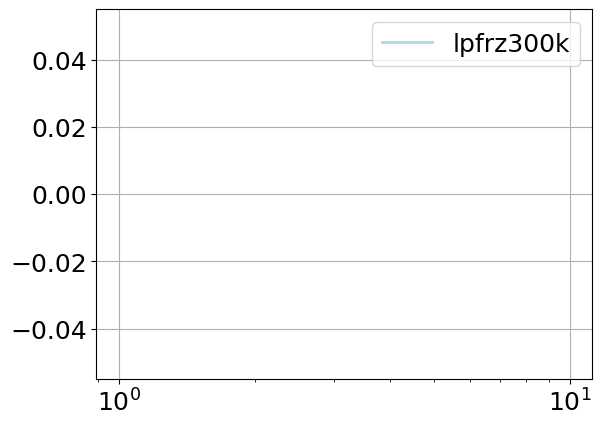

In [4]:
fig, ax = plt.subplots(1,1)
ax.step(nnuc_vals[:-1], hist, where='pre',
             label=cd_name,
             color=cd,
             lw=2, alpha=1)
ax.legend()
ax.set(xscale='log')
ax.grid(True)
plt.show()

## W histogram

In [2]:
ds = xr.open_dataset(file, chunks=chunks)[["OMEGA","T","Z3"]]
ds.Z3

<xarray.DataArray 'Z3' (time: 40, lev: 128, ncol: 147456)> Size: 3GB
dask.array<open_dataset-Z3, shape=(40, 128, 147456), dtype=float32, chunksize=(40, 128, 100000), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 1kB 2.58 3.23 3.88 4.597 ... 987.2 991.0 994.9 998.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol
Attributes:
    mdims:          1
    units:          m
    long_name:      Geopotential Height (above sea level)
    standard_name:  geopotential_height
    cell_methods:   time: point

In [3]:
# z = xr.open_dataset(file.split(".eam.h")[0]+"_Z3_mean.nc").Z3[0,:,0,0].values
z14_index = abs(ds.Z3-14000).argmin(dim='lev')  # np.argmin(abs(z-14000), axis=1)
z14_index

<xarray.DataArray 'Z3' (time: 40, ncol: 147456)> Size: 47MB
dask.array<nanarg_agg-aggregate, shape=(40, 147456), dtype=int64, chunksize=(40, 100000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol

In [4]:
ds = ds.isel(lev=z14_index.compute())
ds


[########################################] | 100% Completed | 56.21 s


<xarray.Dataset> Size: 118MB
Dimensions:  (time: 40, ncol: 147456)
Coordinates:
    lev      (time, ncol) float64 47MB 152.1 152.1 152.1 ... 146.5 146.5 146.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol
Data variables:
    OMEGA    (time, ncol) float32 24MB dask.array<chunksize=(40, 147456), meta=np.ndarray>
    T        (time, ncol) float32 24MB dask.array<chunksize=(40, 147456), meta=np.ndarray>
    Z3       (time, ncol) float32 24MB dask.array<chunksize=(40, 147456), meta=np.ndarray>
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         a10df24500
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/work/sturbeville/E3SM/inputdata/atm/cam/inic/ho...
    topography_file:   /glade/work/sturbeville/E3SM/inputdata/atm/cam/topo/US...
    time_period_freq:  hour_3

In [5]:
w = util.omega2w(ds.OMEGA, ds.OMEGA.lev, ds['T'])

In [6]:
w

<xarray.DataArray (time: 40, ncol: 147456)> Size: 47MB
dask.array<truediv, shape=(40, 147456), dtype=float64, chunksize=(40, 147456), chunktype=numpy.ndarray>
Coordinates:
    lev      (time, ncol) float64 47MB 152.1 152.1 152.1 ... 146.5 146.5 146.5
  * time     (time) object 320B 2000-02-20 03:00:00 ... 2000-02-25 00:00:00
Dimensions without coordinates: ncol

dpscream_rce_large_3km_b_default300k_wbranch
[########################################] | 100% Completed | 43.30 s


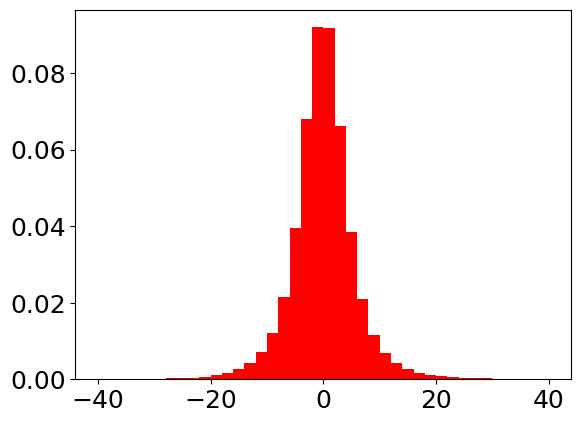

In [9]:
print(run)
(w).plot.hist(bins=np.linspace(-40,40,41), density=True, color='red')
plt.savefig(f"../plots/large/w_hist_last5days_{run}.png", transparent=True)
plt.show()

## mean OLR vs SWU and LW vs SW CRE values


### Mean over the entire simulation

In [11]:
runs = [["dpscream_rce_large_3km_aa_default","dpscream_rce_large_3km_b_default300k_wbranch"],
        ["dpscream_rce_large_3km_aa_304ksst","dpscream_rce_large_3km_d_default304k_wbranch"],
        ["dpscream_rce_large_3km_ab_lsascent", "dpscream_rce_large_3km_lsascent300k_branch", "dpscream_rce_large_3km_a_lsascent300k_wbranch"],
        ["dpscream_rce_large_3km_aa_lsascent_304ksst","dpscream_rce_large_3km_lsascent304k_branch"],
        ["dpscream_rce_large_3km_aa_lpfrz", "dpscream_rce_large_3km_lpfrz300k_branch", "dpscream_rce_large_3km_a_lpfrz300k_wbranch"],
        ["dpscream_rce_large_3km_aa_lpfrz304k", "dpscream_rce_large_3km_lpfrz304k_branch"],
        ["dpscream_rce_large_3km_lpls300k", "dpscream_rce_large_3km_b_lpls300k_wbranch"],
        ["dpscream_rce_large_3km_lpls304k", "dpscream_rce_large_3km_d_lpls304k_wbranch"]]
markers=["D","D","X","X","s","s","o","o"]
# markers = dict(zip(runs,markers_list))
run_dir="/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/"

In [12]:
ndays=30
olrs = {}
swus = {}
lcfs = {}  # longwave cloud forcing
scfs = {}  # shortwave cloud forcing

In [35]:
vars=['FLUT','FSUTOA']
vars=['LWCF','SWCF']
vars=['FLUT','FSUTOA','LWCF','SWCF']
for i,run in enumerate(runs):
    files=[None]*len(run)
    for i in range(len(run_dict[run])):
        for x in os.listdir(run_dir+run_dict[run][i]+"/run/"):
            file_name_start = run_dict[run][i]+".eam.h1"
            if x.startswith(file_name_start):
                # Prints only text file present in My Folder
                print("... " + x)
                files[i] = run_dir+run_dict[run][i]+"/run/"+x
    ds = xr.open_mfdataset(files)[vars]
    ds_starttime = ds.time[-1].values - timedelta(days=ndays)
    print("RUN:", run_name, "starttime", ds_starttime, 'startdate', ds.time[0].values)
    iday = np.argmin(abs(ds.time.values-ds_starttime))
    assert(ds_starttime==ds.time[iday])
    ds = ds.isel(time=slice(iday,-1)).mean(dim=['ncol','time'])
    olrs[run_name]=ds[vars[0]].values
    swus[run_name]=ds[vars[1]].values
    lcfs[run_name]=ds[vars[2]].values
    scfs[run_name]=ds[vars[3]].values
    print("\t", olrs[run_name], "W/m2", swus[run_name], "W/m2")

RUN: default300k starttime 2000-01-31 00:00:00 startdate 2000-01-01 00:00:00
[########################################] | 100% Completed | 28.18 s
[########################################] | 100% Completed | 23.27 s
[########################################] | 100% Completed | 21.11 s
[########################################] | 100% Completed | 12.05 s
	 275.8722 W/m2 66.98277 W/m2
RUN: default304k starttime 2000-01-30 23:00:00 startdate 2000-01-01 00:00:00
[########################################] | 100% Completed | 10.74 s
[########################################] | 100% Completed | 4.80 ss
[########################################] | 100% Completed | 5.06 ss
[########################################] | 100% Completed | 15.37 s
	 287.99945 W/m2 65.02267 W/m2
RUN: lsascent300k starttime 2000-01-31 00:00:00 startdate 2000-01-01 00:00:00
[########################################] | 100% Completed | 8.02 ss
[########################################] | 100% Completed | 7.63 sms
[#####

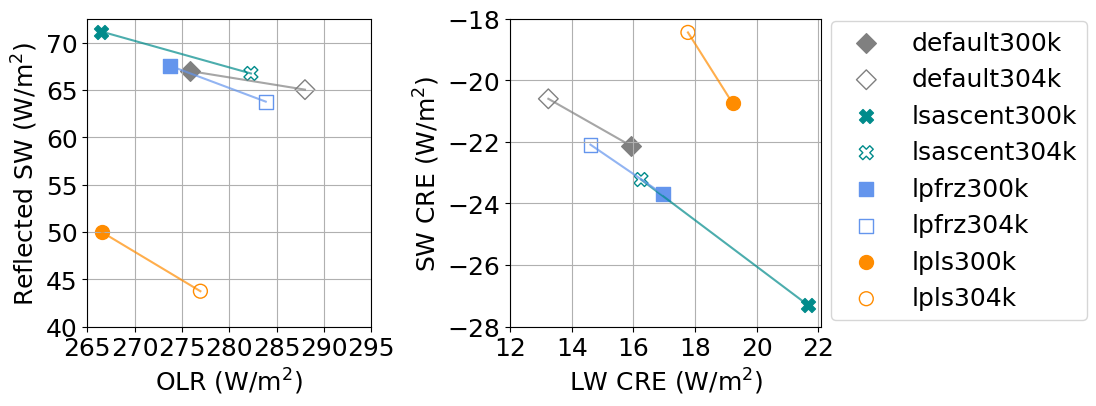

In [39]:
fig, ax = plt.subplots(1,2,figsize=(11,4))  # ,layout="constrained")

for i,run in enumerate(runs):
    if run[1] is not None:
        run_name = run[1].split("_")[-2]
    else:
        run_name = run[0][-8:]
    if i%2==0:
        fc = color_dict[run_name]
    else:
        fc = 'None'
    ax[0].scatter(olrs[run_name],
                  swus[run_name],
                  marker=markers[i],
                  edgecolors=color_dict[run_name],
                  facecolors=fc,
                  label=run_name,
                  s=100
                  )
    ax[1].scatter(lcfs[run_name],
                  scfs[run_name],
                  marker=markers[i],
                  edgecolors=color_dict[run_name],
                  facecolors=fc,
                  s=100
                  )
for r in ["default", "lsascent", "lpfrz", "lpls"]:
    ax[0].plot([olrs[f"{r}300k"],
               olrs[f"{r}304k"]],
               [swus[f"{r}300k"],
               swus[f"{r}304k"]],
               color=color_dict[r],
               alpha=0.7)
    ax[1].plot([lcfs[f"{r}300k"],
               lcfs[f"{r}304k"]],
               [scfs[f"{r}300k"],
               scfs[f"{r}304k"]],
               color=color_dict[r],
               alpha=0.7)

ax[0].grid(True)
ax[1].grid(True)
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
plt.subplots_adjust(wspace=0.05)
fig.legend(loc="center left", bbox_to_anchor=(0.85,0.5))
ax[0].set(xlabel="OLR (W/m$^2$)", ylabel="Reflected SW (W/m$^2$)",
          # xlim=[265,295], ylim=[57,71],
          yticks=np.arange(40,71,5), xticks=np.arange(265,296,5))
ax[1].set(xlabel="LW CRE (W/m$^2$)", ylabel="SW CRE (W/m$^2$)",
          # xlim=[12,22], ylim=[-28,-18],
          xticks=np.arange(12,23,2), yticks=np.arange(-28,-17,2))
plt.savefig(f"../plots/large/mean_LWvSWallsky-cre_all_last{ndays}days.pdf",
            bbox_inches="tight", pad_inches=0.5)
plt.show()

### mean over the last five days (updated wbranch sims)

In [27]:
runs = [["dpscream_rce_large_3km_aa_default","dpscream_rce_large_3km_b_default300k_wbranch"],
        ["dpscream_rce_large_3km_aa_304ksst","dpscream_rce_large_3km_d_default304k_wbranch"],
        ["dpscream_rce_large_3km_ab_lsascent", "dpscream_rce_large_3km_lsascent300k_branch"],
        ["dpscream_rce_large_3km_aa_lsascent_304ksst","dpscream_rce_large_3km_lsascent304k_branch"],
        ["dpscream_rce_large_3km_aa_lpfrz", "dpscream_rce_large_3km_lpfrz300k_branch"],
        ["dpscream_rce_large_3km_aa_lpfrz304k", "dpscream_rce_large_3km_lpfrz304k_branch"],
        ["dpscream_rce_large_3km_lpls300k", "dpscream_rce_large_3km_b_lpls300k_wbranch"],
        ["dpscream_rce_large_3km_lpls304k", "dpscream_rce_large_3km_d_lpls304k_wbranch"]
       ]
run_names = ['default300k','default304k','lsascent300k','lsascent304k','lpfrz300k','lpfrz304k','lpls300k','lpls304k']
markers=["D","D","X","X","s","s","o","o"]
color_dict = {"default300k":'gray', "lsascent300k":'darkcyan', "lpfrz300k":'cornflowerblue', "lpls300k":'darkorange',
              "default304k":'gray', "lsascent304k":'darkcyan', "lpfrz304k":'cornflowerblue', "lpls304k":'darkorange'}
run_dir="/glade/derecho/scratch/sturbeville/DPSCREAM_simulations"

In [7]:
ndays = 4

olrs = {}  # outgoing lw at toa
swus = {}  # shortwave upward at toa
lcfs = {}  # longwave cloud forcing
scfs = {}  # shortwave cloud forcing
ci_lcf = {}  # confience interval
ci_scf = {}  # confidence interval

In [19]:
# get mean values
vars=['FLUT','FSUTOA','LWCF','SWCF']
for i, run in runs:
    if run is not None:
        file0 = [n for n in os.listdir(f"{run_dir}/{run[0]}/run/") if f'{run[0]}.eam.h1' in n][0]
        file1 = [n for n in os.listdir(f"{run_dir}/{run[1]}/run/") if f'{run[1]}.eam.h1' in n][0]
        print(file)
        ds = xr.open_dataset(f"{run_dir}/{run}/run/{file}")[vars]
        ds_starttime = ds.time[-1].values - timedelta(days=ndays)
        print("RUN:", run_name, "starttime", ds_starttime, 'endtime', ds.time[-1].values)
        iday = np.argmin(abs(ds.time.values-ds_starttime))
        assert(ds_starttime==ds.time[iday])
        ds = ds.isel(time=slice(iday,-1))
        print(ds.time[0].values, ds.time[-1].values, 'diff=', (ds.time[-1].values-ds.time[0].values))
        dsmean = ds.mean(dim=['ncol','time'])  # .isel(time=slice(iday,-1))
        olrs[run_name]=dsmean[vars[0]].values
        swus[run_name]=dsmean[vars[1]].values
        lcfs[run_name]=dsmean[vars[2]].values
        scfs[run_name]=dsmean[vars[3]].values
        ci_lcf[run_name] = stats.t.interval(0.8, df=np.prod(np.shape(ds[vars[2]])), loc=np.mean(ds[vars[2]]), scale=np.std(ds[vars[2]], ddof=1) / np.sqrt(len(ds[vars[2]])))-lcfs[run_name]
        ci_scf[run_name] = stats.t.interval(0.8, df=np.prod(np.shape(ds[vars[3]])), loc=np.mean(ds[vars[3]]), scale=np.std(ds[vars[3]], ddof=1) / np.sqrt(len(ds[vars[3]])))-scfs[run_name]

        print("\t", olrs[run_name], "W/m2", swus[run_name], "W/m2")

dpscream_rce_large_3km_b_default300k_wbranch.eam.h1.2000-02-20-03600.nc
RUN: default300k starttime 2000-03-03 00:00:00 endtime 2000-03-07 00:00:00
2000-03-03 00:00:00 2000-03-06 23:00:00 diff= 3 days, 23:00:00
	 271.8147 W/m2 68.018776 W/m2
dpscream_rce_large_3km_d_default304k_wbranch.eam.h1.2000-02-20-03600.nc
RUN: default304k starttime 2000-02-21 00:00:00 endtime 2000-02-25 00:00:00
2000-02-21 00:00:00 2000-02-24 23:00:00 diff= 3 days, 23:00:00
	 286.88528 W/m2 64.1973 W/m2
dpscream_rce_large_3km_lsascent300k_branch.eam.h1.2000-02-20-10800.nc
RUN: lsascent300k starttime 2000-02-26 00:00:00 endtime 2000-03-02 00:00:00
2000-02-26 00:00:00 2000-03-01 21:00:00 diff= 3 days, 21:00:00
	 277.8822 W/m2 59.421463 W/m2
dpscream_rce_large_3km_lsascent304k_branch.eam.h1.2000-02-20-10800.nc
RUN: lsascent304k starttime 2000-02-26 00:00:00 endtime 2000-03-02 00:00:00
2000-02-26 00:00:00 2000-03-01 21:00:00 diff= 3 days, 21:00:00
	 278.85217 W/m2 59.080166 W/m2
dpscream_rce_large_3km_lpfrz300k_branc

In [20]:
lcfs

{'default300k': array(18.527475, dtype=float32),
 'default304k': array(13.233233, dtype=float32),
 'lsascent300k': array(14.936876, dtype=float32),
 'lsascent304k': array(17.096395, dtype=float32),
 'lpfrz300k': array(13.441326, dtype=float32),
 'lpfrz304k': array(13.592532, dtype=float32),
 'lpls300k': array(16.60347, dtype=float32),
 'lpls304k': array(16.920347, dtype=float32)}

In [21]:
ci_lcf

{'default300k': array([-4.61060552,  4.61060552]),
 'default304k': array([-3.95372001,  3.95372001]),
 'lsascent300k': array([-7.10628076,  7.10628076]),
 'lsascent304k': array([-8.10222892,  8.10222892]),
 'lpfrz300k': array([-7.46162261,  7.46162261]),
 'lpfrz304k': array([-7.56734448,  7.56734448]),
 'lpls300k': array([-4.5526994,  4.5526994]),
 'lpls304k': array([-4.60435462,  4.60435462])}

0 default300k
1 default304k
2 lsascent300k
3 lsascent304k
4 lpfrz300k
5 lpfrz304k
6 lpls300k
7 lpls304k


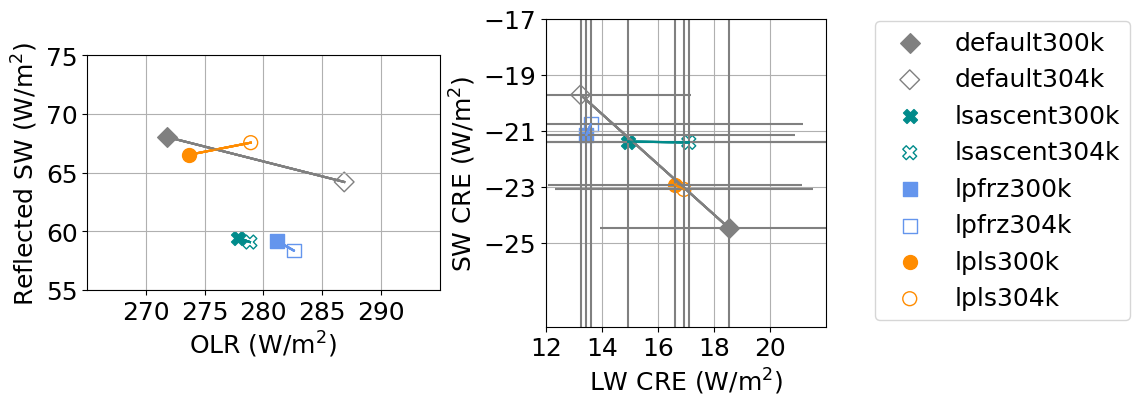

In [25]:
# plot it
fig, ax = plt.subplots(1,2,figsize=(10,4))  # ,layout="constrained")

for i,run in enumerate(runs):
    if run_name is not None:
        run_name = run.split("_")[-2]
        print(i, run_name)
        if run_name[-4:]=="300k":
            fc = color_dict[run_name]
        else:
            fc = 'None'
        ax[0].scatter(olrs[run_name],
                      swus[run_name],
                      marker=markers[i],
                      edgecolors=color_dict[run_name],
                      facecolors=fc,
                      label=run_name,
                      s=100
                      )
        ax[1].scatter(lcfs[run_name],
                      scfs[run_name],
                      marker=markers[i],
                      edgecolors=color_dict[run_name],
                      facecolors=fc,
                      s=100
                      )
        ax[1].errorbar(lcfs[run_name],
                      scfs[run_name],
                      xerr=ci_lcf[run_name][-1],
                      yerr=ci_scf[run_name][-1],
                      ecolor='gray')
    for r in ["default", "lsascent", "lpfrz", "lpls"]:
        ax[0].plot([olrs[r+"300k"],
                   olrs[r+"304k"]],
                   [swus[r+"300k"],
                   swus[r+"304k"]],
                   color=color_dict[r+"300k"],
                   alpha=0.7)
        ax[1].plot([lcfs[r+"300k"],
                   lcfs[r+"304k"]],
                   [scfs[r+"300k"],
                   scfs[r+"304k"]],
                   color=color_dict[r+"300k"],
                   alpha=0.7)

ax[0].grid(True)
ax[1].grid(True)
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
# plt.subplots_adjust(wspace=0.01)
fig.legend(loc="center left", bbox_to_anchor=(0.9,0.5))
ax[0].set(xlabel="OLR (W/m$^2$)", ylabel="Reflected SW (W/m$^2$)",
          xlim=[265,295], ylim=[55,75],
          yticks=np.arange(55,76,5), xticks=np.arange(270,291,5))
ax[1].set(xlabel="LW CRE (W/m$^2$)", ylabel="SW CRE (W/m$^2$)",
          xlim=[12,22], ylim=[-28,-18],
          xticks=np.arange(12,22,2), yticks=np.arange(-25,-15,2))
plt.savefig("../plots/large/mean_LWvSWallsky-cre_all_last5days.pdf", bbox_inches="tight", pad_inches=0.5)
plt.show()